<p align="center">
  <img src="https://i.pinimg.com/1200x/11/24/17/112417488c13995558aa218ab4af4f0d.jpg" style="width:1000px; height:300px;">
</p>

# BOX OFFICE INTELLIGENCE: AHJIN STUDIOS' DEBUT PLAN

### Overview

Ahjin Studios is entering the original film industry at a pivotal moment. With major studios and streaming platforms in a high-stakes race to capture audience attention, the battle for box office dominance has never been more fierce, or more data-driven. While storytelling remains the heart of cinema, strategic decision-making has become its backbone.

This analysis is designed to fuse creativity with commercial intelligence. By analyzing industry-wide trends across genres, release timing, budgets, and audience reception, we aim to decode the anatomy of a box office hit - not just artistically, but financially. The outcome will be a tactical playbook to guide Ahjin Studios as it takes its first bold steps into feature film production.

To achieve this, we are leveraging five robust datasets from major industry sources: IMDb, TMDb, Rotten Tomatoes and The Numbers (Budget/Gross). Together, these provide a comprehensive 360° view of the modern movie landscape.

### Business Problem

The entertainment industry is undergoing a seismic shift. Legacy franchises, tentpole films, and algorithm-fed content have saturated screens, making it harder for newcomers to break through the noise. Audiences are fragmented. Competition is global. And content fatigue is real.

For Ahjin Studios, a rising player with ambition but no prior production history, entering this landscape blind would be risky. Production budgets often stretch into the tens or hundreds of millions, and missteps in genre, budget, cast, or release timing can spell financial disaster. In contrast, the right decisions can lead to outsized returns, cultural impact, and long-term brand equity.

In short, we can't afford to guess. Ahjin Studios must understand:

* What types of films are truly resonating with audiences?
* Which market trends are noise, and which signal long-term opportunity?
* Where can we maximize ROI without chasing blockbusters?
* And most importantly, how can a new studio compete without big-name IPs or A-list stars?

### Objective

To analyze recent movie performance data - spanning box office returns, production costs, genres, ratings, and more - and translate those insights into clear, actionable strategies for Ahjin Studios.

This analysis will serve as a foundation for greenlighting original projects that are not just creative, but commercially viable. It aims to bridge the gap between creative vision and data-driven execution.

### Key Business Questions

* Which genres consistently yield strong financial returns?
* What budget ranges offer the best cost-to-revenue efficiency?
* How does release timing (month, season) affect box office performance?
* To what extent do maturity ratings or runtime influence success?

### Deliverables

* Cleaned and enriched datasets from **five industry sources** (IMDb, TMDb, Rotten Tomatoes and The Numbers)
* Univariate, bivariate, and multivariate analysis exploring box office trends
* Data visualizations illustrating high-performing genres, ROI benchmarks, release timing, and more
* A strategic summary deck with insights and investment-ready recommendations for greenlighting films

### Final Goal

To equip Ahjin Studios’ executive team with a data-driven framework for decision-making in original content production, ensuring each project is launched with clarity, commercial insight, and confidence.

> Lights, camera… strategy.

## INITIAL DATA EXPLORATION (IDE)

Every dataset tells a story- but before we dive into any narratives, we'll flip through the table of contents. This phase is about getting comfortable with the data: seeing what’s there, what’s missing, and what might surprise us later if we don’t pay attention now.

#### What's happening:
- Importing key libraries like 'pandas', 'numpy', 'seaborn' and 'matplotlib'- the usual suspects for slicing, dicing and visualizing data and 'sql' for database manipulation.
- Previewing the first few rows to get a feel for the dataset’s structure, naming conventions, and early red flags (no one likes nasty surprises 30 cells in).
- Checking the shape of the data because whether it's 500 rows or 50,000 completely changes the game.
- Get metadata
- Get basic statistics information of both numerica and categorical columns

This is where trust is built- between us and the dataset.

Exploration done right is part instinct, part structure- this is BOTH!

In [141]:
# Core Libraries for Data Manipulation and Numerical Computation
import pandas as pd
import numpy as np

# Visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Time Series Utlities
import calendar

# Database Interraction
import sqlite3

# Expression Evaluation
import ast

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

### 1. THE NUMBERS (BUDGET)

In [142]:
# Load the dataset
budget_df = pd.read_csv(r'..\Raw_Data\tn.movie_budgets.csv', encoding = 'Latin1')
budget_df.head()

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747

In [143]:
# Display the shape
print(f"The dataset has {budget_df.shape[0]} rows and {budget_df.shape[1]} columns.")

The dataset has 5782 rows and 6 columns.


In [144]:
# Display column names
budget_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [145]:
# Get metadata
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [146]:
# Display descriptive statistics for categorical columns
budget_df.describe(include = 'O').T

count unique           top freq
release_date       5782   2418  Dec 31, 2014   24
movie              5782   5698     King Kong    3
production_budget  5782    509   $20,000,000  231
domestic_gross     5782   5164            $0  548
worldwide_gross    5782   5356            $0  367

In [147]:
# Check for duplicates and null values
print("Duplicates:", budget_df.duplicated().sum())
print("\nNull Values:\n", budget_df.isna().sum())

Duplicates: 0

Null Values:
 id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


### 2. THE NUMBERS (GROSS)

In [148]:
# Load gross dataset
gross_df = pd.read_csv(r'..\Raw_Data\bom.movie_gross.csv')
gross_df.head()

title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010

In [149]:
# Display the shape
print(f"The dataset has {gross_df.shape[0]} rows and {gross_df.shape[1]} columns.")

The dataset has 3387 rows and 5 columns.


In [150]:
# Displya column names
gross_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [151]:
# Get metadata
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [152]:
# Get basic statistics for numerical columns
gross_df.describe()

domestic_gross         year
count    3.359000e+03  3387.000000
mean     2.874585e+07  2013.958075
std      6.698250e+07     2.478141
min      1.000000e+02  2010.000000
25%      1.200000e+05  2012.000000
50%      1.400000e+06  2014.000000
75%      2.790000e+07  2016.000000
max      9.367000e+08  2018.000000

In [153]:
# Get basic statistics for categorical columns
gross_df.describe(include = 'O').T

count unique        top freq
title          3387   3386  Bluebeard    2
studio         3382    257        IFC  166
foreign_gross  2037   1204    1200000   23

In [154]:
# Check for duplicates and null values
print("Duplicates:", gross_df.duplicated().sum())
print("\nNull Values:\n", gross_df.isna().sum())

Duplicates: 0

Null Values:
 title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


### 3. TMDB MOVIES DATASET

In [155]:
# Load TMDB movies dataset
tmdb_df = pd.read_csv(r'..\Raw_Data\tmdb.movies.csv', index_col = 0)
tmdb_df.head()

genre_ids     id original_language  \
0      [12, 14, 10751]  12444                en   
1  [14, 12, 16, 10751]  10191                en   
2        [12, 28, 878]  10138                en   
3      [16, 35, 10751]    862                en   
4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                      How to Train Your Dragon           7.7        7610  
2                                    Iron Man 2           6.8       12368  
3                                     Toy Story           7.9       10174  
4                                     Inception           8.3       22186

In [156]:
# Display the shape
print(f'The dataset has {tmdb_df.shape[0]} rows and {tmdb_df.shape[1]} columns.')

The dataset has 26517 rows and 9 columns.


In [157]:
# Display column names
tmdb_df.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [158]:
# Get metadata
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [159]:
# Display descriptive statistics for numerical columns
tmdb_df.describe().T

count           mean            std   min       25%  \
id            26517.0  295050.153260  153661.615648  27.0  157851.0   
popularity    26517.0       3.130912       4.355229   0.6       0.6   
vote_average  26517.0       5.991281       1.852946   0.0       5.0   
vote_count    26517.0     194.224837     960.961095   1.0       2.0   

                     50%         75%         max  
id            309581.000  419542.000  608444.000  
popularity         1.374       3.694      80.773  
vote_average       6.000       7.000      10.000  
vote_count         5.000      28.000   22186.000

In [160]:
# Display descriptive statistics for categorical columns
tmdb_df.describe(include = 'O').T

count unique         top   freq
genre_ids          26517   2477        [99]   3700
original_language  26517     76          en  23291
original_title     26517  24835        Eden      7
release_date       26517   3433  2010-01-01    269
title              26517  24688        Eden      7

In [161]:
# Check for duplicates and null values
print('Duplicates:', tmdb_df.duplicated().sum())
print('\nNull Values:\n', tmdb_df.isna().sum())

Duplicates: 1020

Null Values:
 genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


### 4. ROTTEN TOMATOES MOVIES INFORMATION DATASET

In [162]:
# Load dataset
rt_movies_df = pd.read_csv(r"..\Raw_Data\rt.movie_info.tsv", sep = '\t')
rt_movies_df.head()

id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2                   Allison Anders  Sep 13, 1996  Apr 18, 2000      NaN   
3  Paul Attanasio|Michael Crichton   Dec 9, 1994  Aug 27, 1997      NaN   
4                     Giles Cooper           NaN           NaN      NaN   

  box_office      runtime             studio  
0        NaN  104 minutes                NaN  
1    600,000  108 minutes  Entertainment One  
2        NaN  116 minutes                NaN  
3        NaN  128 minutes                NaN  
4        NaN  200 minutes                NaN

In [163]:
# Get dataset shape
print(f"The dataset has {rt_movies_df.shape[0]} rows and {rt_movies_df.shape[1]} columns")

The dataset has 1560 rows and 12 columns


In [164]:
# Display column names
rt_movies_df.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [165]:
# Get metadata
rt_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [166]:
# Get basic statistical information for categorical columns
rt_movies_df.describe(include = 'O').T

count unique                                                top  \
synopsis      1498   1497  A group of air crash survivors are stranded in...   
rating        1557      6                                                  R   
genre         1552    299                                              Drama   
director      1361   1125                                   Steven Spielberg   
writer        1111   1069                                        Woody Allen   
theater_date  1201   1025                                        Jan 1, 1987   
dvd_date      1201    717                                        Jun 1, 2004   
currency       340      1                                                  $   
box_office     340    336                                            200,000   
runtime       1530    142                                         90 minutes   
studio         494    200                                 Universal Pictures   

             freq  
synopsis        2  
rating        521  
genre         151  
director       10  
writer          4  
theater_date    8  
dvd_date       11  
currency      340  
box_office      2  
runtime        72  
studio         35

In [167]:
print("Duplicates:", rt_movies_df.duplicated().sum())
print("\nNull Values:\n", rt_movies_df.isna().sum())

Duplicates: 0

Null Values:
 id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


### 5. ROTTEN TOMATOES MOVIE REVIEWS DATASET

In [168]:
# Load the data
rt_reviews_df = pd.read_csv("C:\\Users\\lenovo\\OneDrive\\Desktop\\DS\\PROJECTS\\Data-s-Cut\\Raw_Data\\rt.reviews.tsv", sep = '\t', encoding = 'Latin1')
rt_reviews_df.head()

id                                             review rating   fresh  \
0   3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1   3  It's an allegory in search of a meaning that n...    NaN  rotten   
2   3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3   3  Continuing along a line introduced in last yea...    NaN   fresh   
4   3             ... a perverse twist on neorealism...     NaN   fresh   

           critic  top_critic         publisher               date  
0      PJ Nabarro           0   Patrick Nabarro  November 10, 2018  
1  Annalee Newitz           0           io9.com       May 23, 2018  
2    Sean Axmaker           0  Stream on Demand    January 4, 2018  
3   Daniel Kasman           0              MUBI  November 16, 2017  
4             NaN           0      Cinema Scope   October 12, 2017

In [169]:
# Check shape
print(f"The dataset has {rt_reviews_df.shape[0]} rows and {rt_reviews_df.shape[1]} columns.")

The dataset has 54432 rows and 8 columns.


In [170]:
# Print out all columns
rt_reviews_df.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [171]:
# Get metadata
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [172]:
# Get descriptive statistics of all categorical columns
rt_reviews_df.describe(include = 'O').T

count unique                      top   freq
review     48869  48682  Parental Content Review     24
rating     40915    186                      3/5   4327
fresh      54432      2                    fresh  33035
critic     51710   3496             Emanuel Levy    595
publisher  54123   1281          eFilmCritic.com    673
date       54432   5963          January 1, 2000   4303

In [173]:
# Check data completeness and duplicates
print("Duplicates:", rt_reviews_df.duplicated().sum())
print("\nMissing Values:\n", rt_reviews_df.isna().sum())

Duplicates: 9

Missing Values:
 id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64


### 6. MERGE ROTTEN TOMATOES DATA

To enrich our reviews dataset with additional movie context, we'll perform a left join between the Rotten Tomatoes Reviews dataset (rt_reviews_df) and the Rotten Tomatoes Movies dataset (rt_movies_df). This allows us to bring in key metadata - such as genre, runtime, and maturity rating - for each review.

Since both datasets share an id column (movie identifier), we use it as the merge key. We'll also rename the rating column in rt_movies_df to maturity_rating to avoid confusion with review scores.

In [174]:
tomato_df = rt_reviews_df.merge(
    rt_movies_df.rename(columns = {'rating': 'maturity_rating'}),
    on = 'id',
    how = 'left'
)

tomato_df.head()

id                                             review rating   fresh  \
0   3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1   3  It's an allegory in search of a meaning that n...    NaN  rotten   
2   3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3   3  Continuing along a line introduced in last yea...    NaN   fresh   
4   3             ... a perverse twist on neorealism...     NaN   fresh   

           critic  top_critic         publisher               date  \
0      PJ Nabarro           0   Patrick Nabarro  November 10, 2018   
1  Annalee Newitz           0           io9.com       May 23, 2018   
2    Sean Axmaker           0  Stream on Demand    January 4, 2018   
3   Daniel Kasman           0              MUBI  November 16, 2017   
4             NaN           0      Cinema Scope   October 12, 2017   

                                            synopsis maturity_rating  \
0  New York City, not-too-distant-future: Eric Pa...               R   
1  New York City, not-too-distant-future: Eric Pa...               R   
2  New York City, not-too-distant-future: Eric Pa...               R   
3  New York City, not-too-distant-future: Eric Pa...               R   
4  New York City, not-too-distant-future: Eric Pa...               R   

                               genre          director  \
0  Drama|Science Fiction and Fantasy  David Cronenberg   
1  Drama|Science Fiction and Fantasy  David Cronenberg   
2  Drama|Science Fiction and Fantasy  David Cronenberg   
3  Drama|Science Fiction and Fantasy  David Cronenberg   
4  Drama|Science Fiction and Fantasy  David Cronenberg   

                         writer  theater_date     dvd_date currency  \
0  David Cronenberg|Don DeLillo  Aug 17, 2012  Jan 1, 2013        $   
1  David Cronenberg|Don DeLillo  Aug 17, 2012  Jan 1, 2013        $   
2  David Cronenberg|Don DeLillo  Aug 17, 2012  Jan 1, 2013        $   
3  David Cronenberg|Don DeLillo  Aug 17, 2012  Jan 1, 2013        $   
4  David Cronenberg|Don DeLillo  Aug 17, 2012  Jan 1, 2013        $   

  box_office      runtime             studio  
0    600,000  108 minutes  Entertainment One  
1    600,000  108 minutes  Entertainment One  
2    600,000  108 minutes  Entertainment One  
3    600,000  108 minutes  Entertainment One  
4    600,000  108 minutes  Entertainment One

In [175]:
# Check new dataframe shape
print(f"New dataset has {tomato_df.shape[0]} rows and {tomato_df.shape[1]} columns.")

New dataset has 54432 rows and 19 columns.


In [176]:
# Check new columns
tomato_df.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date', 'synopsis', 'maturity_rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [177]:
# Get metadata
tomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               54432 non-null  int64 
 1   review           48869 non-null  object
 2   rating           40915 non-null  object
 3   fresh            54432 non-null  object
 4   critic           51710 non-null  object
 5   top_critic       54432 non-null  int64 
 6   publisher        54123 non-null  object
 7   date             54432 non-null  object
 8   synopsis         54300 non-null  object
 9   maturity_rating  54346 non-null  object
 10  genre            54345 non-null  object
 11  director         48992 non-null  object
 12  writer           45206 non-null  object
 13  theater_date     53206 non-null  object
 14  dvd_date         53206 non-null  object
 15  currency         33310 non-null  object
 16  box_office       33310 non-null  object
 17  runtime          53594 non-null

In [178]:
# Get descriptive statistics of the categorical variables
tomato_df.describe(include = 'O').T

count unique  \
review           48869  48682   
rating           40915    186   
fresh            54432      2   
critic           51710   3496   
publisher        54123   1281   
date             54432   5963   
synopsis         54300   1117   
maturity_rating  54346      5   
genre            54345    250   
director         48992    843   
writer           45206    857   
theater_date     53206    860   
dvd_date         53206    628   
currency         33310      1   
box_office       33310    297   
runtime          53594    113   
studio           40125    162   

                                                               top   freq  
review                                     Parental Content Review     24  
rating                                                         3/5   4327  
fresh                                                        fresh  33035  
critic                                                Emanuel Levy    595  
publisher                                          eFilmCritic.com    673  
date                                               January 1, 2000   4303  
synopsis         THREE BILLBOARDS OUTSIDE EBBING, MISSOURI is a...    338  
maturity_rating                                                  R  24371  
genre                                                        Drama   7413  
director                                            Clint Eastwood    808  
writer                                             Martin McDonagh    338  
theater_date                                           Jan 9, 2015    459  
dvd_date                                               Jun 1, 2004    542  
currency                                                         $  33310  
box_office                                              52,000,189    338  
runtime                                                115 minutes   2079  
studio                                          Universal Pictures   4422

In [179]:
# Check its completeness and duplicates
print("Duplicates:", tomato_df.duplicated().sum())
print("\nMissing Values:\n", tomato_df.isna().sum())

Duplicates: 9

Missing Values:
 id                     0
review              5563
rating             13517
fresh                  0
critic              2722
top_critic             0
publisher            309
date                   0
synopsis             132
maturity_rating       86
genre                 87
director            5440
writer              9226
theater_date        1226
dvd_date            1226
currency           21122
box_office         21122
runtime              838
studio             14307
dtype: int64


### 7. IMDb DATABASE EXPLORATION

In [180]:
# Create database connection
conn = sqlite3.connect(r'..\Raw_Data\im.db')
cur = conn.cursor()

# View all tables in the database
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
cur.fetchall()

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

### Focus Areas

We’re working with a local IMDB database structured across multiple relational tables:

- movie_basics
- directors
- known_for  
- movie_akas  
- movie_ratings  
- persons
- principals  
- writers

Our primarily focus is on the **movie_basics** and **movie_ratings** tables, as they form the foundation for exploring patterns in movie data and audience response.

At this stage, we’ll begin by:
- Inspecting the structure and columns of each table
- Understanding how the tables relate (e.g. shared keys)
- Identifying relevant variables for our analysis

Our goal is to uncover trends, correlations, and insights from movie metadata (like genre, title, year). Let’s start by peeking inside the structure of these two key tables.

### Movie Basics Table Exploration

In [181]:
# Connect to movie_basics table and print out first few rows
moviebasics_df = pd.read_sql(
    """
        SELECT *
        FROM movie_basics
    """, conn)

moviebasics_df.head()

movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy

In [182]:
# Get table shape
print(f"The table contains {moviebasics_df.shape[0]} rows and {moviebasics_df.shape[1]} columns")

The table contains 146144 rows and 6 columns


In [183]:
# Get column names
moviebasics_df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [184]:
# Get metadata
moviebasics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [185]:
# Get basic statistical information for all categorical variables
moviebasics_df.describe(include = 'O').T

count  unique          top   freq
movie_id        146144  146144    tt9914662      1
primary_title   146144  136071         Home     24
original_title  146123  137773       Broken     19
genres          140736    1085  Documentary  32185

In [186]:
# Get basic statistical information for all numeric variables
moviebasics_df.describe().T

count         mean         std     min     25%     50%  \
start_year       146144.0  2014.621798    2.733583  2010.0  2012.0  2015.0   
runtime_minutes  114405.0    86.187247  166.360590     1.0    70.0    87.0   

                    75%      max  
start_year       2017.0   2115.0  
runtime_minutes    99.0  51420.0

In [187]:
# Display number of duplicates and null values
print("Duplicates:", moviebasics_df.duplicated().sum())
print("\nNull Values:\n", moviebasics_df.isna().sum())

Duplicates: 0

Null Values:
 movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


### Movie Ratings Table

In [188]:
# Load movie_ratings table
movieratings_df = pd.read_sql(
    """
        SELECT *
        FROM movie_ratings
    """, conn)

movieratings_df.head()

movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21

In [189]:
# Get table shape
print(f"The table contains {movieratings_df.shape[0]} rows and {movieratings_df.shape[1]} columns")

The table contains 73856 rows and 3 columns


In [190]:
# F+Get column names
movieratings_df.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

In [191]:
# Get metadata
movieratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [192]:
# Get basic statistical information of numeric variables
movieratings_df.describe().T

count         mean           std  min   25%   50%    75%  \
averagerating  73856.0     6.332729      1.474978  1.0   5.5   6.5    7.4   
numvotes       73856.0  3523.662167  30294.022971  5.0  14.0  49.0  282.0   

                     max  
averagerating       10.0  
numvotes       1841066.0

In [193]:
# Find out number of duplicates and null values present
print("Duplicates:", movieratings_df.duplicated().sum())
print("\nNull Values:\n", movieratings_df.isna().sum())

Duplicates: 0

Null Values:
 movie_id         0
averagerating    0
numvotes         0
dtype: int64


### Merge IMDb Movie Basics with Ratings

To create a comprehensive IMDb dataset, we perform an INNER JOIN between the movie_basics and movie_ratings tables using their shared movie_id. This operation allows us to pair each movie's metadata with its corresponding audience metrics - average rating and number of votes.

The resulting DataFrame, imdb_df, will form the foundation for our analysis of film quality and audience engagement.

In [194]:
# Merge the two datasets on the common column movie_id
q = """
    SELECT
        mb.movie_id,
        mb.primary_title,
        mb.original_title,
        mb.start_year,
        mb.runtime_minutes,
        mb.genres,
        mr.averagerating,
        mr.numvotes
    FROM movie_basics mb
    INNER JOIN movie_ratings mr ON mb.movie_id = mr.movie_id;
"""

imdb_df = pd.read_sql(q, conn)
imdb_df.head()

movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  averagerating  numvotes  
0        2013            175.0    Action,Crime,Drama            7.0        77  
1        2019            114.0       Biography,Drama            7.2        43  
2        2018            122.0                 Drama            6.9      4517  
3        2018              NaN          Comedy,Drama            6.1        13  
4        2017             80.0  Comedy,Drama,Fantasy            6.5       119

In [195]:
# Get new dataset shape
print(f"The dataset contains {imdb_df.shape[0]} rows and {imdb_df.shape[1]} columns")

The dataset contains 73856 rows and 8 columns


In [196]:
# Check column names
imdb_df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [197]:
# Get metadata
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [198]:
# Get basic statistical information for numeric columns
imdb_df.describe().T

count         mean           std     min     25%     50%  \
start_year       73856.0  2014.276132      2.614807  2010.0  2012.0  2014.0   
runtime_minutes  66236.0    94.654040    208.574111     3.0    81.0    91.0   
averagerating    73856.0     6.332729      1.474978     1.0     5.5     6.5   
numvotes         73856.0  3523.662167  30294.022971     5.0    14.0    49.0   

                    75%        max  
start_year       2016.0     2019.0  
runtime_minutes   104.0    51420.0  
averagerating       7.4       10.0  
numvotes          282.0  1841066.0

In [199]:
# Get basic statistical information for categorical columns
imdb_df.describe(include = 'O').T

count unique         top   freq
movie_id        73856  73856   tt9904820      1
primary_title   73856  69993  The Return     11
original_title  73856  71097       Lucky      9
genres          73052    923       Drama  11612

In [200]:
# Get duplicate and null values counts
print("Duplicates:", imdb_df.duplicated().sum())
print("\nNull Values:\n", imdb_df.isna().sum())

Duplicates: 0

Null Values:
 movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64


### OBSERVATIONS AND EARLY INSIGHTS

The goal was to understand data structure, completeness, and quality before diving into cleaning or storytelling.

Here is a summary of our early findings:

#### 1. **Movie Budgets Dataset**

* Shape: 5,782 rows × 6 columns
* Key Columns: release_date, movie, production_budget, domestic_gross, worldwide_gross
* Highlights:
  * No missing values - dataset is fully complete.
  * All monetary fields are stored as strings (e.g "$100,000,000") and require conversion to numeric types.
  * Over 500 movies show $0 in domestic_gross, and 367 in worldwide_gross. These likely indicate unreported or unavailable data.
  * No duplicate entries found.

#### 2. **Gross Revenue Dataset**

* Shape: 3,387 rows × 5 columns
* Key Columns: title, studio, domestic_gross, foreign_gross, year
* Highlights:
  * foreign_gross has 1,350 missing values - over one-third of the dataset.
  * Minor missingness in studio (5 rows) and domestic_gross (28 rows).
  * Monetary columns are stored as strings - will need cleaning for analysis.
  * No duplicate rows detected.

#### 3. **TMDB Movies Dataset**

* Shape: 26,517 rows × 9 columns
* Key Columns: genre_ids, original_title, popularity, vote_average, vote_count
* Highlights:
  * No missing values - data is complete.
  * 1,020 duplicate entries found; will need deduplication.
  * genre_ids are stored as stringified lists - need to be parsed for genre-level insights.
  * Rich data on audience sentiment, popularity trends, and voting behavior.

#### 4. **IMDb Database (Merged)**

* Shape: 73,856 rows × 8 columns
* Key Columns: primary_title, original_title, start_year, runtime_minutes, genres, averagerating, numvotes
* Highlights:
  * runtime_minutes has 7,620 missing entries (~10% of data).
  * genres missing in 804 rows.
  * One extreme outlier in runtime_minutes (~51,420 mins) - needs capping or removal.
  * No duplicate records.
  * Ratings data is robust - average rating is ~6.3, normally distributed around 6.5.
  * Voting counts vary drastically, with some titles exceeding 1.8M votes.
  * Documentary is the most common genre.

#### 5. **Rotten Tomatoes Dataset (Merged)**

* Shape: 54,432 rows × 19 columns
* Key Columns: movie, genre, runtime, director, writer, studio, theater_date, dvd_date, box_office
* Highlights:
  * Key metadata like writer, director, and studio had significant missingness, which has been imputed with Unknown.
  * review, critic, rating, publisher, and currency columns were removed due to sparsity or irrelevance.
  * runtime was standardized and missing values filled using the median.
  * box_office values were cleaned into numeric format for statistical analysis.
  * maturity_rating, genre, and date fields were critical enough to warrant dropping rows with missing entries.
  * No obvious duplication observed post-merge.

These insights help prioritize cleaning tasks and shape our storytelling strategy. We'll focus on handling missingness (especially runtimes and revenues), converting key fields to numeric types, and isolating outliers before diving into visual storytelling.

## DATA WRANGLING

Now that we've completed the initial data exploration, the next step is systematic cleaning and transformation across all datasets to prep them for analysis.

#### 1. Universal Cleaning Tasks

We'll apply the following across all relevant datasets:

* **Convert currency strings to floats** for columns like production_budget, domestic_gross, and foreign_gross.
* **Handle missing values** strategically:

  * Drop where essential (e.g missing genre or runtime)
  * Impute or tag as "Unknown" in non-critical categoricals (e.g writer, studio)
* **Remove duplicates**: Over 1,020 duplicates identified in the TMDB Movies dataset.

#### 2. Dates & Titles

To enable alignment across sources:

* Standardize movie titles and release dates.
* Parse all date fields (release_date, start_year, theater_date, dvd_date) into datetime format.
* Engineer features like year, month, and weekday from these dates.

#### 3. IMDB Tables

Focus areas:

* **Clean extreme outliers** in runtime_minutes (e.g 51,420 mins).
* **Parse genre strings** (pipe-delimited) into lists for categorical analysis.
* **Ensure consistent typing** of movie_id across movie_basics and movie_ratings before any merges.

#### 4. Rotten Tomatoes Dataset

Key transformations:

* Drop rows with missing values in critical fields: genre, maturity_rating, theater_date, and dvd_date.
* Clean runtime:
  * Remove "minutes" text
  * Convert to float
  * Impute missing values with median runtime
* Fill nulls in categoricals (writer, director, studio, box_office_bucket) with "Unknown".
* Drop verbose metadata/review columns (rating, synopsis, critic, etc.) to reduce dimensional noise.
* Convert theater_date and dvd_date to datetime and extract date components.

### HANDLING NULL VALUES
#### 1. GROSS DATASET

In [201]:
null_counts = gross_df.isna().sum()
null_percentages = (null_counts / len(gross_df)) * 100

print("Missing Values Overview:\n")
print(pd.concat([null_counts.rename("Null Count"), null_percentages.round(2).rename("Null Percentage (%)")], axis = 1))

Missing Values Overview:

                Null Count  Null Percentage (%)
title                    0                 0.00
studio                   5                 0.15
domestic_gross          28                 0.83
foreign_gross         1350                39.86
year                     0                 0.00


#### 'studio' Column

In [202]:
# Get rows with nulls
gross_df.loc[gross_df['studio'].isna()]

title studio  domestic_gross foreign_gross  year
210   Outside the Law (Hors-la-loi)    NaN         96900.0       3300000  2010
555         Fireflies in the Garden    NaN         70600.0       3300000  2011
933           Keith Lemon: The Film    NaN             NaN       4000000  2012
1862                 Plot for Peace    NaN          7100.0           NaN  2014
2825               Secret Superstar    NaN             NaN     122000000  2017

In [203]:
# Impute nulls in studio column
gross_df.loc[gross_df['title'] == 'Plot for Peace', 'studio'] = 'Trinity Films'
gross_df.loc[gross_df['title'] == 'Fireflies in the Garden', 'studio'] = 'Senator Entertainmet Inc.'
gross_df.loc[gross_df['title'] == 'Keith Lemon: The Film', 'studio'] = 'Lionsgate'
gross_df.loc[gross_df['title'] == 'Secret Superstar', 'studio'] = 'Zee Studios'
gross_df.loc[gross_df['title'] == 'Outside the Law (Hors-la-loi)', 'studio'] = 'StudioCanal'

# Preview changes
print("Null values after imputation:", gross_df['studio'].isna().sum())

Null values after imputation: 0


#### 'domestic_gross' Column

In [204]:
# Get rows with nulls
gross_df.loc[gross_df['domestic_gross'].isna()].head()

title   studio  domestic_gross  \
230             It's a Wonderful Afterlife      UTV             NaN   
298  Celine: Through the Eyes of the World     Sony             NaN   
302                             White Lion    Scre.             NaN   
306                       Badmaash Company     Yash             NaN   
327                     Aashayein (Wishes)  Relbig.             NaN   

    foreign_gross  year  
230       1300000  2010  
298        119000  2010  
302         99600  2010  
306         64400  2010  
327          3800  2010

In [205]:
median_gross = gross_df['domestic_gross'].median()
gross_df['domestic_gross'] = gross_df['domestic_gross'].fillna(median_gross)

print("Null Values after imputation:", gross_df['domestic_gross'].isna().sum())

Null Values after imputation: 0


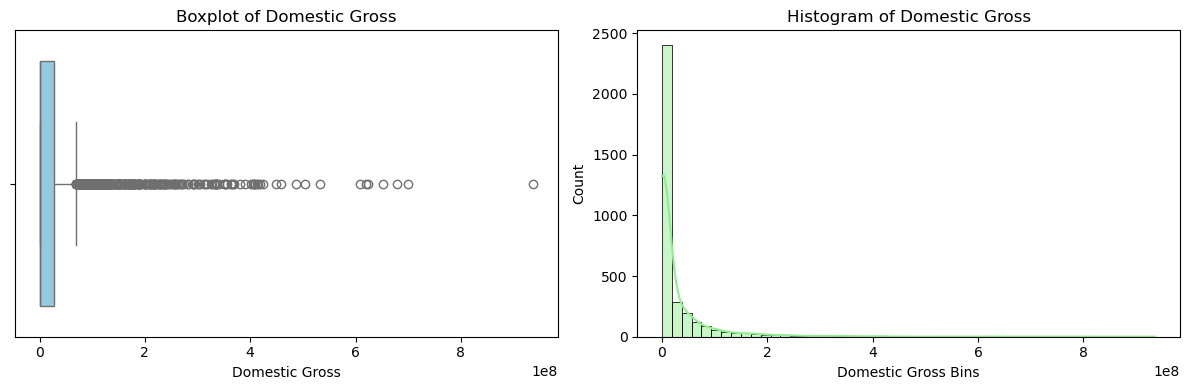

In [284]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

# Boxplot
sns.boxplot(data=gross_df, x='domestic_gross', ax = axes[0], color = 'skyblue')
axes[0].set_title("Boxplot of Domestic Gross")
axes[0].set_xlabel("Domestic Gross")

# Histogram with KDE
sns.histplot(data = gross_df, x = 'domestic_gross', bins=50, kde=True, ax = axes[1], color = 'lightgreen')
axes[1].set_title("Histogram of Domestic Gross")
axes[1].set_xlabel("Domestic Gross Bins")
plt.tight_layout()
plt.show()

#### 'foreign_gross' Column

In [207]:
# Preview rows with nulls in foreign_gross
gross_df.loc[gross_df['foreign_gross'].isna()].head()

title studio  domestic_gross  \
222                                 Flipped     WB       1800000.0   
254  The Polar Express (IMAX re-issue 2010)     WB        673000.0   
267                          Tiny Furniture    IFC        392000.0   
269           Grease (Sing-a-Long re-issue)   Par.        366000.0   
280                         Last Train Home  Zeit.        288000.0   

    foreign_gross  year  
222           NaN  2010  
254           NaN  2010  
267           NaN  2010  
269           NaN  2010  
280           NaN  2010

In [208]:
# Inspect unique values in foreign_gross
gross_df.loc[~gross_df['foreign_gross'].astype(str).str.replace(',', '').str.isnumeric(), 'foreign_gross'].unique()

array([nan, '1,131.6', '1,019.4', '1,163.0', '1,010.0', '1,369.5'],
      dtype=object)

In [209]:
# Imputation strategy:

# Coerce to numeric
gross_df['foreign_gross'] = pd.to_numeric(gross_df['foreign_gross'], errors='coerce')

# Impute median
median_foreign_gross = gross_df['foreign_gross'].median()
gross_df['foreign_gross'] = gross_df['foreign_gross'].fillna(median_foreign_gross)

# Preview changes
print("Null Values after imputation:", gross_df['foreign_gross'].isna().sum())

Null Values after imputation: 0


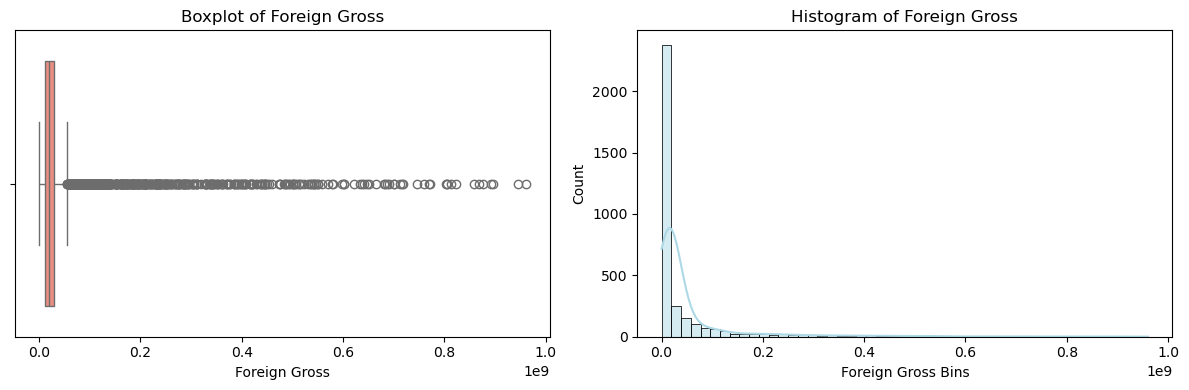

In [282]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

# Boxplot
sns.boxplot(data=gross_df, x='foreign_gross', ax = axes[0], color = 'salmon')
axes[0].set_title("Boxplot of Foreign Gross")
axes[0].set_xlabel("Foreign Gross")

# Histogram with KDE
sns.histplot(data = gross_df, x = 'foreign_gross', bins = 50, kde = True, ax = axes[1], color = 'lightblue')
axes[1].set_title("Histogram of Foreign Gross")
axes[1].set_xlabel("Foreign Gross Bins")
plt.tight_layout()
plt.show()

### OTLIER HANDLING IN GROSS DATASET

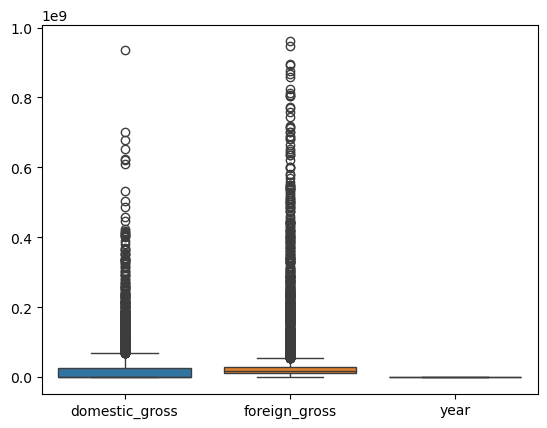

In [211]:
sns.boxplot(gross_df);

#### Comment on Outliers

> The boxplots for both **domestic** and **foreign gross** clearly reveal the presence of extreme outliers - films that have earned substantially more than the majority. In the movie industry, these are typically blockbuster titles, franchise installments, or globally viral releases with massive marketing budgets and wide theatrical distribution. These high-grossing films, while statistically extreme, represent genuine and meaningful data points.
>
> **Removing these outliers would strip away the very success stories we aim to emulate**. Therefore, we will **retain the outliers** in our analysis to ensure we capture the full spectrum of market performance and derive actionable insights from the most profitable examples.

### ROTTEN TOMATOES DATASET

In [212]:
null_counts = tomato_df.isna().sum()
null_percentages = (null_counts / len(tomato_df)) * 100

print("Missing Values Overview:\n")
print(pd.concat([null_counts.rename("Null Count"), null_percentages.round(2).rename("Null Percentage (%)")], axis = 1))

Missing Values Overview:

                 Null Count  Null Percentage (%)
id                        0                 0.00
review                 5563                10.22
rating                13517                24.83
fresh                     0                 0.00
critic                 2722                 5.00
top_critic                0                 0.00
publisher               309                 0.57
date                      0                 0.00
synopsis                132                 0.24
maturity_rating          86                 0.16
genre                    87                 0.16
director               5440                 9.99
writer                 9226                16.95
theater_date           1226                 2.25
dvd_date               1226                 2.25
currency              21122                38.80
box_office            21122                38.80
runtime                 838                 1.54
studio                14307                

### Dropping Irrelevant Columns

We drop columns such as rating, currency, synopsis, review, critic, top_critic, and publisher due to high missingness or limited analytical value. A summary of remaining null values was generated to guide further cleaning.

In [213]:
# Drop useless columns
tomato_df = tomato_df.drop(columns = [
    "rating",
    "currency",
    "synopsis",
    "review",
    "critic",
    "top_critic",
    "publisher"
])

null_counts = tomato_df.isna().sum()
null_percentages = (null_counts / len(tomato_df)) * 100

print("Missing Values Overview:\n")
print(pd.concat([null_counts.rename("Null Count"), null_percentages.round(2).rename("Null Percentage (%)")], axis = 1))

Missing Values Overview:

                 Null Count  Null Percentage (%)
id                        0                 0.00
fresh                     0                 0.00
date                      0                 0.00
maturity_rating          86                 0.16
genre                    87                 0.16
director               5440                 9.99
writer                 9226                16.95
theater_date           1226                 2.25
dvd_date               1226                 2.25
box_office            21122                38.80
runtime                 838                 1.54
studio                14307                26.28


We drop rows with missing values in genre, maturity_rating, theater_date, and dvd_date as these are essential for analysis. For runtime, we standardized the format and imputed missing values using the median to preserve distribution characteristics.

In [214]:
# Drop nulls in maturity_rating, genre
tomato_df = tomato_df.dropna(subset = ['genre', 'maturity_rating', 'theater_date', 'dvd_date'])

# =============== Impute missing runtimes with median ===================
# Standardise rintime column first
tomato_df['runtime'] = tomato_df['runtime'].str.replace(' minutes', '', regex = False).astype(float)
median_runtime = tomato_df['runtime'].median()
tomato_df['runtime'] = tomato_df['runtime'].fillna(median_runtime)

### Date Conversion and Feature Extraction

We convert theater_date and dvd_date to datetime format using coercion to handle invalid entries. From the valid dates, we extract year, month, and day of the week to support time-based analysis and trend exploration.

In [215]:
# Convert to datetime with coercion
tomato_df['theater_date'] = pd.to_datetime(tomato_df['theater_date'], errors='coerce')
tomato_df['dvd_date'] = pd.to_datetime(tomato_df['dvd_date'], errors='coerce')

# Extract components only where dates are valid
tomato_df.loc[tomato_df['theater_date'].notna(), 'release_year'] = tomato_df['theater_date'].dt.year
tomato_df.loc[tomato_df['theater_date'].notna(), 'release_month'] = tomato_df['theater_date'].dt.month
tomato_df.loc[tomato_df['theater_date'].notna(), 'release_day'] = tomato_df['theater_date'].dt.day_name()

tomato_df.loc[tomato_df['dvd_date'].notna(), 'dvd_year'] = tomato_df['dvd_date'].dt.year
tomato_df.loc[tomato_df['dvd_date'].notna(), 'dvd_month'] = tomato_df['dvd_date'].dt.month
tomato_df.loc[tomato_df['dvd_date'].notna(), 'dvd_day'] = tomato_df['dvd_date'].dt.day_name()

In [216]:
# Clean and convert box_office to numeric
tomato_df['box_office'] = (
    tomato_df['box_office']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .replace('nan', np.nan)
    .astype(float)
)

# Define custom bin edges and labels
bin_edges = [0, 1e6, 1e7, 5e7, 1e8, 4e8]
bin_labels = [
    'Flop (<$1M)',
    'Low ($1M–10M)',
    'Mid ($10M–50M)',
    'High ($50M–100M)',
    'Blockbuster (>$100M)'
]

# Create the binned column
tomato_df['box_office_bucket'] = pd.cut(
    tomato_df['box_office'],
    bins=bin_edges,
    labels=bin_labels,
    include_lowest=True,
    right=False
)

# Fill missing values with 'Unknown'
tomato_df['box_office_bucket'] = tomato_df['box_office_bucket'].astype(str).replace('nan', 'Unknown')

# Sanity Check
print(tomato_df['box_office_bucket'].value_counts())

box_office_bucket
Unknown                 20007
Mid ($10M–50M)          12170
Low ($1M–10M)            6803
Blockbuster (>$100M)     6052
High ($50M–100M)         5144
Flop (<$1M)              3030
Name: count, dtype: int64


In [217]:
# Fill null in director, writer and studio
tomato_df[['writer', 'director', 'studio']] = tomato_df[['writer', 'director', 'studio']].fillna('Unknown')

In [218]:
# Sanity Check
tomato_df.isna().sum()

id                       0
fresh                    0
date                     0
maturity_rating          0
genre                    0
director                 0
writer                   0
theater_date             0
dvd_date                 0
box_office           20007
runtime                  0
studio                   0
release_year             0
release_month            0
release_day              0
dvd_year                 0
dvd_month                0
dvd_day                  0
box_office_bucket        0
dtype: int64

### Handling box_office: Why Retain the Original Column

After thorough preprocessing, we converted the box_office column to numeric format and engineered a new categorical feature, box_office_bucket, which bins revenue figures into meaningful categories such as *Flop (<\$1M)*, *Mid (\$10M–50M)*, and *Blockbuster (>\$100M)*.

While the new bucketed column helps group movies for aggregate analysis and visualizations, we deliberately chose not to drop or impute the original box_office column.

Here's why:

* **Granularity**: The raw box_office values retain precise financial information that may be useful for fine-grained exploratory analysis (e.g., distribution skews, outlier detection).
* **Future Utility**: If needed, this column allows us to re-bin with different thresholds, model revenue as a continuous variable, or calculate ROI when paired with budget data.
* **Avoiding Distortion**: Imputing large-scale monetary figures (with median/mean/etc.) risks introducing significant bias or distorting variance.

Thus, while box_office_bucket enhances categorical insights, retaining box_office as-is ensures we don't lose the quantitative fidelity of the original data.

### IMDB DATASET

In [219]:
# Get null values percentage to guide on imputation
null_counts = imdb_df.isna().sum()
null_percentages = (null_counts / len(imdb_df)) * 100

print("Missing Values Overview:\n")
print(pd.concat([null_counts.rename("Null Count"), null_percentages.round(2).rename("Null Percentage (%)")], axis = 1))

Missing Values Overview:

                 Null Count  Null Percentage (%)
movie_id                  0                 0.00
primary_title             0                 0.00
original_title            0                 0.00
start_year                0                 0.00
runtime_minutes        7620                10.32
genres                  804                 1.09
averagerating             0                 0.00
numvotes                  0                 0.00


In [220]:
# Impute missing values in runtime_minutes with median because it is more statistically sound
median_runtime = imdb_df['runtime_minutes'].median()
imdb_df['runtime_minutes'] = imdb_df['runtime_minutes'].fillna(median_runtime)

# Drop null values in 'genres'
imdb_df = imdb_df.dropna(subset = ['genres'])

# Preview changes
print("Missing Values after imputation:\n", imdb_df.isna().sum())

# Check new shape
print(f"\nThe dataset now contains {imdb_df.shape[0]} rows and {imdb_df.shape[1]} columns")

Missing Values after imputation:
 movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

The dataset now contains 73052 rows and 8 columns


#### OUTLIER HANDLING FOR MERGED IMDB DATASET

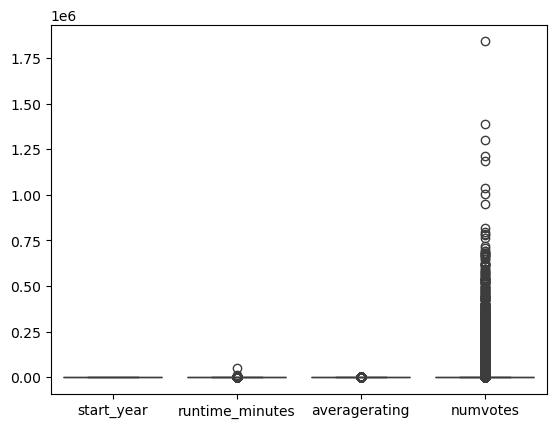

In [221]:
sns.boxplot(imdb_df);

### Outlier Commentary

The boxplot reveals clear outliers across multiple numeric columns:

- **runtime_minutes**: Several films significantly exceed the typical range, likely due to special formats (e.g director’s cuts, miniseries logged as films) or data entry errors. These extreme values are sparse but can skew distribution-based analyses like mean runtime or standard deviation.

- **numvotes**: This variable exhibits extreme right-skewness, with a small subset of movies receiving disproportionately high votes - likely blockbusters or cult classics. These outliers are *genuine signals*, not noise, and provide valuable insight into popularity dynamics. However, log-transforming or binning may be helpful if modeling or clustering is later considered.

- **averagerating** and **start_year**: Outliers here are less severe. A few ratings may hit extreme values (e.g unusually low or high), but IMDb caps the rating scale, so distortion is limited. For start_year, occasional anomalies (e.g pre-1900 entries or far-future entries) may be metadata quirks or special historical/fictional content.

**Takeaway**: Most outliers are *contextual* - they often carry meaning rather than being simple anomalies. Thus, should not be dropped blindly. Instead, they offer rich angles for narrative exploration, especially when highlighting patterns in niche genres, cult films, or legacy cinema.

### HANDLING DUPLICATES
#### 1. TMDB MOVIES

In [222]:
print("Duplicates before imputation:", tmdb_df.duplicated().sum())

# Drop duplicates
tmdb_df = tmdb_df.drop_duplicates()

print("\nSanity Check:")
print("Duplicates after dropping:", tmdb_df.duplicated().sum())

Duplicates before imputation: 1020

Sanity Check:
Duplicates after dropping: 0


### ROTTEN TOMATOES DATASET

In [223]:
print("Duplicates:", tomato_df.duplicated().sum())

# Drop Duplicates
tomato_df = tomato_df.drop_duplicates()

print("\nSanity Check:")
print("Duplicates after dropping:", tomato_df.duplicated().sum())

Duplicates: 26067

Sanity Check:
Duplicates after dropping: 0


### HANDLING CATEGORICAL VARIABLES

#### BUDGET DATASET

In [224]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The financial columns in our dataset - production_budget, domestic_gross, and worldwide_gross - are originally stored as strings with dollar signs and commas (e.g "$150,000,000"), making them unsuitable for numerical computations or visualizations.

To prepare these columns:

1. We define a list of relevant columns to clean.
2. For each column, we:

   * Strip out dollar signs ($) and commas (,) using regex.
   * Convert the cleaned strings to numeric float type.

In [225]:
cols_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in cols_to_clean:
    budget_df[col] = (
        budget_df[col]
        .str.replace(r'[\$,]', '', regex = True)
        .astype(float)
    )

# Sanity check
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


### TMDB GENRE CLEANUP

In [226]:
tmdb_df.head()

genre_ids     id original_language  \
0      [12, 14, 10751]  12444                en   
1  [14, 12, 16, 10751]  10191                en   
2        [12, 28, 878]  10138                en   
3      [16, 35, 10751]    862                en   
4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                      How to Train Your Dragon           7.7        7610  
2                                    Iron Man 2           6.8       12368  
3                                     Toy Story           7.9       10174  
4                                     Inception           8.3       22186

#### Mapping TMDb Genre IDs to Human-Readable Names

The TMDb dataset encodes movie genres using numerical genre_ids, making it hard to interpret or visualize genre distributions meaningfully. Each movie may have one or multiple genre IDs stored as a list (or stringified list). To make this data usable for analysis and visualization:

1. We first ensure all genre entries are proper lists, converting any string representations using Python's ast.literal_eval.
2. Then, we map each numeric ID to its corresponding genre name using a predefined dictionary provided by TMDb.
3. Finally, we join the genre names with a delimiter (|) for easier downstream processing such as exploding, filtering, or visualization.

In [227]:
# Convert genre_ids from string to list
tmdb_df['genre_ids'] = tmdb_df['genre_ids'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Map genre IDs to names
genre_id_map = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History',
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'Science Fiction',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western'
}

# Map and join into a single string
tmdb_df['genres'] = tmdb_df['genre_ids'].apply(
    lambda ids: '|'.join([genre_id_map.get(i, 'Unknown') for i in ids])
)

# Sanity Check
tmdb_df.head()

genre_ids     id original_language  \
0      [12, 14, 10751]  12444                en   
1  [14, 12, 16, 10751]  10191                en   
2        [12, 28, 878]  10138                en   
3      [16, 35, 10751]    862                en   
4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  \
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788   
1                      How to Train Your Dragon           7.7        7610   
2                                    Iron Man 2           6.8       12368   
3                                     Toy Story           7.9       10174   
4                                     Inception           8.3       22186   

                               genres  
0            Adventure|Fantasy|Family  
1  Fantasy|Adventure|Animation|Family  
2    Adventure|Action|Science Fiction  
3             Animation|Comedy|Family  
4    Action|Science Fiction|Adventure

In [228]:
print("Null Values:\n", tmdb_df.isna().sum())

Null Values:
 genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
genres               0
dtype: int64


## EXPLORATORY DATA ANALYSIS (EDA)

This section uncovers the structure, patterns, and surprises hidden in our movie datasets. We'll leverage descriptive statistics, visualizations, and comparative analysis to derive actionable insights.

The workflow is broken into **three analytical phases**:

1. **Time Series Exploration**
2. **Dataset-specific Deep Dives**
3. **Cross-Dataset Insight Mining**

#### Analytical Roadmap

| Dataset          | Analytical Focus                                                               |
| ---------------- | ------------------------------------------------------------------------------ |
| Rotten Tomatoes  | Rating trends, theater/DVD release dynamics, genre-review–box office behavior  |
| IMDb             | Runtime, genre popularity, average ratings, movie frequency by year            |
| TN Movie Budgets | Budget allocation vs gross return patterns, ROI detection, genre-level margins |
| BOM Gross        | Domestic vs international box office evolution, country-based appeal           |
| TMDb             | Popularity score trends, vote volume spread, genre engagement over time        |

**Phase 0** - Temporal Trends (Time Series Analysis)

We begin by examining trends over time to identify industry evolution and external disruptions.

**Phase 1** - Dataset-Specific Univariate and Bivariate Analysis

Each dataset will be analyzed independently to surface dataset-specific strengths, limitations, and standout trends.

**Phase 2** - Cross-Dataset Integration & Multivariate Analysis

Once we understand each dataset individually, we integrate them for richer comparisons and causal relationships.

<p align="left">
  <img src="https://i.pinimg.com/1200x/13/54/ce/1354ce896e7d9e96f47106dfb70267cd.jpg" style="width:1000px; height:300px;">
</p>

## 1. TIME SERIES ANALYSIS
Movies live and die by release timing - trends shift, markets evolve, and box office behavior often hinges on when a film hits theaters. To tap into this temporal dynamic, we begin by converting all relevant date columns to proper datetime format. This enables powerful time-based operations: resampling, trend detection, seasonal decomposition, and more.

In this section, we:

- Convert all date-related columns to datetime objects

- Inspect temporal coverage and granularity

- Visualize key metrics over time (e.g number of movies released, budget trends, gross revenue dynamics)

- Identify long-term patterns, spikes, or declines tied to specific periods (e.g pre/post-pandemic, summer releases)

- Let’s bring time into the frame - because in film, timing is everything.

### THE NUMBERS DATASET

In [229]:
# Convert release_date to datetime
budget_df['release_date'] = pd.to_datetime(budget_df['release_date'], errors = 'coerce')

# Extract relevant date components
budget_df['release_year'] = budget_df['release_date'].dt.year
budget_df['release_month'] = budget_df['release_date'].dt.month
budget_df['release_weekday'] = budget_df['release_date'].dt.day_name()
budget_df['release_quarter'] = budget_df['release_date'].dt.quarter

# Preview Changes
budget_df.head()

id release_date                                        movie  \
0   1   2009-12-18                                       Avatar   
1   2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2   3   2019-06-07                                 Dark Phoenix   
3   4   2015-05-01                      Avengers: Age of Ultron   
4   5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross  release_year  \
0        425000000.0     760507625.0     2.776345e+09          2009   
1        410600000.0     241063875.0     1.045664e+09          2011   
2        350000000.0      42762350.0     1.497624e+08          2019   
3        330600000.0     459005868.0     1.403014e+09          2015   
4        317000000.0     620181382.0     1.316722e+09          2017   

   release_month release_weekday  release_quarter  
0             12          Friday                4  
1              5          Friday                2  
2              6          Friday                2  
3              5          Friday                2  
4             12          Friday                4

#### Movie Release Trends over the years

In [230]:
# Prepare year data and trend
release_trend = budget_df.groupby('release_year').size().reset_index(name = 'movie_count')

# Decade summary
release_trend['decade'] = release_trend['release_year'].apply(
    lambda x: f"{(x//10)*10}–{(x//10)*10 + 9}"
)

decade_summary = (
    release_trend.groupby('decade')['movie_count']
    .sum()
    .reset_index()
    .assign(decade_start = lambda df: df['decade'].str.extract(r'(\d{4})').astype(int))
    .sort_values('decade_start')
    .drop(columns = 'decade_start')
)

print("Movie Releases per Decade:\n")
print(decade_summary.to_string(index = False))

Movie Releases per Decade:

   decade  movie_count
1910–1919            3
1920–1929            5
1930–1939           16
1940–1949           24
1950–1959           40
1960–1969           72
1970–1979          111
1980–1989          301
1990–1999          823
2000–2009         2193
2010–2019         2191
2020–2029            3


#### Monthly movie releases at the Movie Theater

In [231]:
# Prepare data
monthly_releases = (
    budget_df.groupby('release_month')
    .size()
    .reset_index(name='movie_count')
    .sort_values('release_month')
)
monthly_releases['month_name'] = monthly_releases['release_month'].apply(lambda x: calendar.month_name[x])
monthly_releases = monthly_releases[['release_month', 'month_name', 'movie_count']]

# Print distribution
print("Movie Releases per Month:\n")
print(monthly_releases.to_string(index=False))

Movie Releases per Month:

 release_month month_name  movie_count
             1    January          347
             2   February          392
             3      March          470
             4      April          454
             5        May          407
             6       June          479
             7       July          440
             8     August          496
             9  September          493
            10    October          573
            11   November          486
            12   December          745


#### Seasonal Movie Release Trends

In [232]:
# Map months to seasons
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Assign season
budget_df['season'] = budget_df['release_month'].apply(assign_season)

# Group and count
seasonal_releases = (
    budget_df['season']
    .value_counts()
    .reindex(['Winter', 'Spring', 'Summer', 'Autumn'])
    .reset_index()
)
seasonal_releases.columns = ['season', 'movie_count']

# Print distribution
print("Movie Releases by Season:\n")
print(seasonal_releases.to_string(index=False))

# Define a season-specific color palette
season_colors = {
    'Winter': '#90caf9',
    'Spring': '#a5d6a7',
    'Summer': '#ffcc80',
    'Autumn': '#bcaaa4'
}

Movie Releases by Season:

season  movie_count
Winter         1484
Spring         1331
Summer         1415
Autumn         1552


#### Weekly Movie Releases

In [233]:
# Define weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group and sort
release_by_weekday = (
    budget_df['release_weekday']
    .value_counts()
    .reindex(weekday_order)
    .reset_index()
)
release_by_weekday.columns = ['Weekday', 'Movie Count']

# Print distribution
print("Movie Releases by Weekday:\n")
print(release_by_weekday)

Movie Releases by Weekday:

     Weekday  Movie Count
0     Monday           59
1    Tuesday          290
2  Wednesday          621
3   Thursday          172
4     Friday         4539
5   Saturday           56
6     Sunday           45


In [234]:
# Custom soft color palettes
soft_colors = ['#FFB5A7', '#FCD5CE', '#F8EDEB', '#D8E2DC', '#A2D2FF', '#B5EAD7', '#E2F0CB']
season_colors = {'Spring': '#A3E4D7', 'Summer': '#F9E79F', 'Autumn': '#F5CBA7', 'Winter': '#AED6F1'}

# Create subplot layout: 2 rows x 2 columns
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[
        "<b>Annual Theater Releases</b>",
        "<b>Monthly Release Trends</b>",
        "<b>Seasonal Release Distribution</b>",
        "<b>Releases by Weekday</b>"
    ]
)

# ==== Yearly Release Trend ====
fig.add_trace(go.Scatter(
    x=release_trend['release_year'],
    y=release_trend['movie_count'],
    mode='lines+markers',
    name='Yearly',
    marker=dict(size=6, color='crimson', symbol='circle'),
    line=dict(color='orangered', width=3)
), row=1, col=1)

# ==== Subplot 2: Monthly Releases ====
fig.add_trace(go.Bar(
    x=monthly_releases['month_name'],
    y=monthly_releases['movie_count'],
    marker=dict(color=monthly_releases['movie_count'], colorscale='Sunset'),
    name='Monthly'
), row=1, col=2)

# ==== Seasonal Releases  ====
fig.add_trace(go.Bar(
    x=seasonal_releases['season'],
    y=seasonal_releases['movie_count'],
    marker=dict(color=[season_colors[s] for s in seasonal_releases['season']]),
    name='Seasonal'
), row=2, col=1)

# ==== Weekday Releases ====
fig.add_trace(go.Bar(
    x=release_by_weekday['Weekday'],
    y=release_by_weekday['Movie Count'],
    marker=dict(color=soft_colors[:len(release_by_weekday)]),
    name='Weekday'
), row=2, col=2)

# Layout and styling
fig.update_layout(
    height=900,
    width=1200,
    title=dict(
        text="<b>Movie Release Trends Overview by The Numbers</b>",
        x=0.5,
        font=dict(size=24, family='Lato', color='black')
    ),
    plot_bgcolor='#f9f9f9',
    paper_bgcolor='#f9f9f9',
    font=dict(family='Lato', color='black'),
    margin=dict(t=90, b=60, l=60, r=40),
    hovermode='x unified',
    showlegend=False
)

# Axis titles and styling
axis_config = dict(showgrid=True, gridcolor='#e0e0e0', zeroline=False)

fig.update_xaxes(title_text="Year", row=1, col=1, tickmode='linear', dtick=10, **axis_config)
fig.update_yaxes(title_text="Number of Movies", row=1, col=1, **axis_config)

fig.update_xaxes(title_text="Month", row=1, col=2, tickangle=-45, **axis_config)
fig.update_yaxes(title_text="Number of Movies", row=1, col=2, **axis_config)

fig.update_xaxes(title_text="Season", row=2, col=1, **axis_config)
fig.update_yaxes(title_text="Number of Movies", row=2, col=1, **axis_config)

fig.update_xaxes(title_text="Weekday", row=2, col=2, **axis_config)
fig.update_yaxes(title_text="Number of Movies", row=2, col=2, **axis_config)

fig.show()

### *Observation*

#### Decade Trends
- There is a clear upward trajectory in theatrical releases, especially from the 1980s onward.
- The 1990s, 2000s, and 2010s saw exponential growth, each decade producing more than the previous, with over 2,000 films released in the 2000s and 2010s.
- The surge likely reflects the expansion of the global film market, improvements in production technology, and the rise of independent studios.

#### Monthly Patterns
- December leads with the highest number of releases (745), likely due to holiday season box office potential and award season positioning.
- October, August, and September also show strong activity, often aligned with horror releases, end-of-summer audiences, and fall festivals.
- January and February are historically the quietest, often used to release lower-risk titles or clear studio backlogs.

#### Seasonal Trends
- Autumn and Winter dominate as the most active seasons for theatrical releases, capitalizing on holidays, award contention, and increased audience availability.
- Spring has the fewest releases, suggesting it may be less commercially favorable for most films unless positioned as pre-summer tentpoles.

#### Weekday Release Strategy
- Friday overwhelmingly dominates with over 4,500 releases, as studios aim to maximize opening weekend performance.
- Tuesday and Wednesday follow distantly, likely for midweek premieres or limited releases.
- Very few films are released on Mondays, Saturdays, or Sundays, likely due to low audience turnout and minimal promotional buildup.

These timing patterns provide essential insights for Ahjin Studios in determining optimal windows for theatrical release.

### ROTTEN TOMATOES

#### Yearly Movie Releases

In [235]:
# Prepare year data and trend
release_trend = (
    tomato_df['release_year']
    .dropna()
    .astype(int)
    .value_counts()
    .reset_index(name='movie_count')
    .rename(columns={'index': 'release_year'})
    .sort_values('release_year')
)

# Decade summary
release_trend['decade'] = release_trend['release_year'].apply(
    lambda x: f"{(x // 10) * 10}–{(x // 10) * 10 + 9}"
)

decade_summary = (
    release_trend.groupby('decade')['movie_count']
    .sum()
    .reset_index()
    .assign(decade_start=lambda df: df['decade'].str.extract(r'(\d{4})').astype(int))
    .sort_values('decade_start')
    .drop(columns='decade_start')
)

print("Movie Releases per Decade:\n")
print(decade_summary.to_string(index=False))

Movie Releases per Decade:

   decade  movie_count
1920–1929           30
1930–1939          140
1940–1949          331
1950–1959          574
1960–1969          615
1970–1979          708
1980–1989         2129
1990–1999         4259
2000–2009        10566
2010–2019         7787


#### Monthly Movie Releases

In [236]:
# Group and count releases per month
monthly_releases = (
    tomato_df.groupby('release_month')
    .size()
    .reset_index(name='movie_count')
    .dropna(subset=['release_month'])
    .sort_values('release_month')
)

# Ensure release_month is integer
monthly_releases['release_month'] = monthly_releases['release_month'].astype(int)

# Map month number to name
monthly_releases['month_name'] = monthly_releases['release_month'].apply(lambda x: calendar.month_name[x])
monthly_releases = monthly_releases[['release_month', 'month_name', 'movie_count']]

# Print distribution
print("Movie Releases per Month As Recorded by Rotten Tomatoes:\n")
print(monthly_releases.to_string(index=False))

Movie Releases per Month As Recorded by Rotten Tomatoes:

 release_month month_name  movie_count
             1    January         2537
             2   February         1569
             3      March         1917
             4      April         1831
             5        May         1843
             6       June         2431
             7       July         2094
             8     August         2120
             9  September         2125
            10    October         2495
            11   November         3023
            12   December         3154


#### Seasonality

In [237]:
# Map months to seasons
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Assign season
tomato_df['season'] = tomato_df['release_month'].apply(assign_season)

# Group and count
seasonal_releases = (
    tomato_df['season']
    .value_counts()
    .reindex(['Winter', 'Spring', 'Summer', 'Autumn'])
    .reset_index()
)
seasonal_releases.columns = ['season', 'movie_count']

# Print distribution
print("Movie Releases by Season As Recorded by Rotten Tomatoes:\n")
print(seasonal_releases.to_string(index=False))

Movie Releases by Season As Recorded by Rotten Tomatoes:

season  movie_count
Winter         7260
Spring         5591
Summer         6645
Autumn         7643


#### Weekly

In [238]:
# Define weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group and sort
release_by_weekday = (
    tomato_df['release_day']
    .value_counts()
    .reindex(weekday_order)
    .reset_index()
)
release_by_weekday.columns = ['Weekday', 'Movie Count']

# Print distribution
print("Movie Releases by Weekday:\n")
print(release_by_weekday)

Movie Releases by Weekday:

     Weekday  Movie Count
0     Monday          810
1    Tuesday          448
2  Wednesday         3402
3   Thursday         1453
4     Friday        20048
5   Saturday          553
6     Sunday          425


In [239]:
# ============ DATA PREP ============

total_movies = len(tomato_df)

# Yearly
yearly_trend = (
    tomato_df['release_year']
    .dropna()
    .astype(int)
    .value_counts()
    .rename_axis('release_year')
    .reset_index(name='movie_count')
    .sort_values('release_year')
)
yearly_trend['percentage'] = (yearly_trend['movie_count'] / total_movies * 100).round(2)

# Monthly
monthly_releases = (
    tomato_df.dropna(subset=['release_month'])
    .assign(release_month=lambda df: df['release_month'].astype(int))
    .groupby('release_month')
    .size()
    .reset_index(name='movie_count')
)
monthly_releases['month_name'] = monthly_releases['release_month'].apply(lambda x: calendar.month_name[x])
monthly_releases['percentage'] = (monthly_releases['movie_count'] / total_movies * 100).round(2)

# Seasonal
def assign_season(month: int) -> str:
    if month in [12, 1, 2]: return 'Winter'
    if month in [3, 4, 5]: return 'Spring'
    if month in [6, 7, 8]: return 'Summer'
    return 'Autumn'

tomato_df['season'] = tomato_df['release_month'].dropna().astype(int).apply(assign_season)
seasonal_releases = (
    tomato_df['season']
    .value_counts()
    .reindex(['Winter', 'Spring', 'Summer', 'Autumn'])
    .reset_index()
)
seasonal_releases.columns = ['season', 'movie_count']
seasonal_releases['percentage'] = (seasonal_releases['movie_count'] / total_movies * 100).round(2)

# Weekday
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tomato_df['release_day'] = tomato_df['release_day'].str.strip().str.title()

release_by_weekday = (
    tomato_df['release_day']
    .value_counts()
    .reindex(weekday_order, fill_value=0)
    .reset_index()
)
release_by_weekday.columns = ['Weekday', 'Movie Count']
release_by_weekday['percentage'] = (release_by_weekday['Movie Count'] / total_movies * 100).round(2)

# ============ PLOTTING ============

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[
        "Annual Movie Releases",
        "Monthly Movie Releases",
        "Seasonal Movie Releases",
        "Weekday Movie Releases"
    ],
    specs=[[{"type": "scatter"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}]]
)

# Yearly
fig.add_trace(go.Scatter(
    x=yearly_trend['release_year'],
    y=yearly_trend['movie_count'],
    mode='lines+markers',
    name='Yearly',
    line=dict(color='crimson', width=3),
    marker=dict(size=6),
    hovertemplate='<b>Release Year:</b> %{x}<br>' +
                  '<b>Movies Released:</b> %{y}<br>' +
                  '<b>Percentage of Total:</b> %{customdata[0]}%' +
                  '<extra></extra>',
    customdata=yearly_trend[['percentage']].values
), row=1, col=1)

# Monthly
fig.add_trace(go.Bar(
    x=monthly_releases['month_name'],
    y=monthly_releases['movie_count'],
    name='Monthly',
    marker_color='orange',
    hovertemplate='<b>Month:</b> %{x}<br>' +
                  '<b>Movies Released:</b> %{y}<br>' +
                  '<b>Percentage of Total:</b> %{customdata[0]}%' +
                  '<extra></extra>',
    customdata=monthly_releases[['percentage']].values
), row=1, col=2)

# Seasonal
season_colors = {
    'Winter': '#90caf9', 'Spring': '#a5d6a7',
    'Summer': '#ffcc80', 'Autumn': '#bcaaa4'
}
fig.add_trace(go.Bar(
    x=seasonal_releases['season'],
    y=seasonal_releases['movie_count'],
    name='Seasonal',
    marker_color=[season_colors[s] for s in seasonal_releases['season']],
    hovertemplate='<b>Season:</b> %{x}<br>' +
                  '<b>Movies Released:</b> %{y}<br>' +
                  '<b>Percentage of Total:</b> %{customdata[0]}%' +
                  '<extra></extra>',
    customdata=seasonal_releases[['percentage']].values
), row=2, col=1)

# Weekday
fig.add_trace(go.Bar(
    x=release_by_weekday['Weekday'],
    y=release_by_weekday['Movie Count'],
    name='Weekday',
    marker_color='indianred',
    customdata=release_by_weekday[['percentage']].values,
    hovertemplate='<b>Weekday:</b> %{x}<br>' +
                  '<b>Movies Released:</b> %{y}<br>' +
                  '<b>Percentage of Total:</b> %{customdata[0]}%' +
                  '<extra></extra>'
), row=2, col=2)

# ============ Layout ============

fig.update_layout(
    title=dict(
        text="Rotten Tomatoes Movie Release Trends",
        x=0.5, xanchor='center',
        font=dict(size=20, family='Lato', weight='bold')
    ),
    showlegend=False,
    height=800,
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    font=dict(family='Lato', color='black'),
    margin=dict(t=80, l=60, r=40, b=60)
)

# Axis Titles
fig.update_xaxes(title_text="Year", row=1, col=1, tickmode='linear', dtick=10)
fig.update_yaxes(title_text="Number of Movies", row=1, col=1)

fig.update_xaxes(title_text="Month", row=1, col=2, tickangle=-45)
fig.update_yaxes(title_text="Number of Movies", row=1, col=2)

fig.update_xaxes(title_text="Season", row=2, col=1)
fig.update_yaxes(title_text="Number of Movies", row=2, col=1)

fig.update_xaxes(title_text="Weekday", row=2, col=2)
fig.update_yaxes(title_text="Number of Movies", row=2, col=2)

fig.show()

### *Observation*

##### Decade Trends
- The number of releases has increased dramatically with time, particularly from the 1980s onward.
- The 2000s saw a peak with over **10,000 films**, indicating the explosion of both mainstream and independent productions.
- While the 2010s saw a slight drop (7,787 films), this may reflect delayed data updates or shifts toward streaming platforms post-2015.

##### Monthly Patterns
- **December** leads with the highest number of releases (3,154), followed by **November** (3,023) and **January** (2,537). This aligns with holiday season strategies and awards qualification runs.
- The summer months - **June, July, August** - also show strong figures, driven by blockbuster strategies.
- **February** has the fewest releases (1,569), likely due to the post-awards and pre-spring slump.

##### Seasonal Patterns
- **Autumn (7,643)** and **Winter (7,260)** dominate, reflecting the industry's focus on award campaigns and holiday audiences.
- **Spring** sees the fewest films released (5,591), reinforcing its weaker commercial draw.

##### Weekday Patterns
- **Friday** is the dominant release day by far, with **20,048** films, underscoring the importance of weekend box office returns.
- Midweek releases - especially **Wednesday (3,402)** - may cater to limited releases or festival openings.
- **Sunday and Saturday** have the fewest releases, suggesting these are not favored launch days.

Overall, the Rotten Tomatoes dataset reinforces traditional industry release strategies, with Friday and holiday - season dominance being consistent trends.

#### TEMPORAL DVD AND THEATER RELEASES

In [240]:
# Define bin size and bin edges
bin_size = 6
min_year = int(min(tomato_df['release_year'].min(), tomato_df['dvd_year'].min()))
max_year = int(max(tomato_df['release_year'].max(), tomato_df['dvd_year'].max()))
bins = list(range(min_year, max_year + bin_size, bin_size))

# Bin theater years
theater_binned = tomato_df['release_year'].dropna().astype(int)
theater_bins = pd.cut(theater_binned, bins=bins, right=False)
theater_dist = theater_bins.value_counts().sort_index()

# Bin DVD years
dvd_binned = tomato_df['dvd_year'].dropna().astype(int)
dvd_bins = pd.cut(dvd_binned, bins=bins, right=False)
dvd_dist = dvd_bins.value_counts().sort_index()

# Combine into a DataFrame
dist_df = pd.DataFrame({
    'Theater Releases': theater_dist,
    'DVD Releases': dvd_dist
}).fillna(0).astype(int)

# Format the index into readable year ranges
dist_df.index = dist_df.index.map(lambda x: f"{x.left}-{x.right - 1}")

# Display
print(dist_df)

# Count releases per year
theater_yearly = tomato_df['release_year'].value_counts().sort_index()
dvd_yearly = tomato_df['dvd_year'].value_counts().sort_index()

# Merge into single DataFrame
year_df = pd.DataFrame({
    'Theater Releases': theater_yearly,
    'DVD Releases': dvd_yearly
}).fillna(0).astype(int)
year_df.index.name = 'Year'
year_df = year_df.reset_index()

# Determine tick frequency based on year range
year_range = year_df['Year'].max() - year_df['Year'].min()
tick_step = 2 if year_range <= 20 else 5

# Plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=year_df['Year'],
    y=year_df['Theater Releases'],
    mode='lines+markers',
    name='Theater Releases',
    line=dict(color='#1f77b4', width=3),
    marker=dict(symbol='circle', size=6),
    hovertemplate='Year: %{x}<br>Theater: %{y}<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=year_df['Year'],
    y=year_df['DVD Releases'],
    mode='lines+markers',
    name='DVD Releases',
    line=dict(color='#ff7f0e', width=3, dash='dash'),
    marker=dict(symbol='square', size=6),
    hovertemplate='Year: %{x}<br>DVD: %{y}<extra></extra>'
))

# Update layout
fig.update_layout(
    title=dict(
        text='Theater vs DVD Movie Releases by Year',
        font=dict(size=22),
        x=0.5
    ),
    xaxis=dict(
        title='Release Year',
        tickmode='linear',
        tick0=year_df['Year'].min(),
        dtick=tick_step,
        tickangle=45,
        showgrid=True,
        gridcolor='rgba(220,220,220,0.4)',
    ),
    yaxis=dict(
        title='Number of Releases',
        gridcolor='rgba(220,220,220,0.4)'
    ),
    legend=dict(
        title='Format',
        orientation='h',
        x=0.5,
        xanchor='center',
        y=1.1
    ),
    template='plotly_white',
    height=500,
    margin=dict(l=60, r=40, t=80, b=100),
    hovermode = 'x unified'
)

fig.show()

           Theater Releases  DVD Releases
1921-1926                30             0
1927-1932                25             0
1933-1938                72             0
1939-1944               254             0
1945-1950               144             0
1951-1956               186             0
1957-1962               484             0
1963-1968               443             0
1969-1974               443             0
1975-1980               473             0
1981-1986              1182             0
1987-1992              1730           107
1993-1998              2900          1384
1999-2004              6383         11336
2005-2010              5442          6827
2011-2016              5274          5386
2017-2022              1674          2099


### *Observation*

* **DVD releases were non-existent** before the late 1980s, consistent with the technology's commercial availability timeline.
* **Theater releases steadily increased** from the 1930s, peaking around **1999–2004**, then gradually declined afterward.
* **DVD releases surged sharply** between **1999–2004**, even **outpacing theater releases**, reflecting the DVD boom era.
* Both formats show a **decline post-2010**, with theater releases dropping steeply after **2016**, possibly due to streaming disruption and the COVID-19 impact.
* **The 1987–2004 period** marks the rise of dual-format dominance, while **post-2016** suggests an industry shift away from physical distribution.

#### MONTHLY THEATER AND DVD DISTRIBUTION

In [241]:
# Count releases by month number
theater_monthly = tomato_df['release_month'].value_counts().sort_index()
dvd_monthly = tomato_df['dvd_month'].value_counts().sort_index()

# Map numeric index to month names
month_names = [calendar.month_name[int(m)] for m in theater_monthly.index]

# Combine into DataFrame with month names as index
monthly_df = pd.DataFrame({
    'Theater Releases': theater_monthly.values,
    'DVD Releases': dvd_monthly.reindex(theater_monthly.index, fill_value=0).values
}, index=month_names)

# Reorder by calendar order
month_order = list(calendar.month_name)[1:]
monthly_df = monthly_df.reindex(month_order)

# Display
print(monthly_df)

# Visualise
fig = go.Figure(data=[
    go.Bar(name='Theater Releases', x=monthly_df.index, y=monthly_df['Theater Releases'], marker_color='indianred'),
    go.Bar(name='DVD Releases', x=monthly_df.index, y=monthly_df['DVD Releases'], marker_color='royalblue')
])

# Update layout
fig.update_layout(
    title='Monthly Movie Releases (Theater vs DVD)',
    xaxis_title='Month',
    yaxis_title='Number of Releases',
    barmode='group',
    template='plotly_white',
    xaxis_tickangle=0,
    hovermode = 'x unified'
)

fig.show()

           Theater Releases  DVD Releases
January                2537          1471
February               1569          2735
March                  1917          3850
April                  1831          2266
May                    1843          2589
June                   2431          2216
July                   2094          1534
August                 2120          2077
September              2125          2169
October                2495          2301
November               3023          2229
December               3154          1702


### *Observation*

* **Theater releases** peak in **December** and **November**, with another high in **June**, aligning with holiday seasons and summer blockbusters.
* **DVD releases** peak in **March** and **February**, suggesting a 2–3 month lag after major theater releases.
* There's a noticeable **inverse relationship** early in the year: months with fewer theater releases (like February) tend to have more DVD drops.
* Overall, **theater releases concentrate around end-of-year and mid-year**, while **DVD releases cluster in the first quarter**, reflecting distribution strategy patterns.

## 2. UNIVARIATE ANALYSIS

Univariate analysis helps us understand the distribution, central tendency, and spread of individual variables in isolation. In this section, we’ll explore key numerical and categorical features, such as production budgets, revenues, genres, and runtimes, to detect skewness, outliers, and potential data quality issues.

This step lays the foundation for more complex relationships by first mastering each variable on its own.

### GENRE DISTRIBUTION

#### IMDb

In [242]:
# Split and explode genres
imdb_df['genre_split'] = imdb_df['genres'].str.split(',')
imdb_genres_exploded = imdb_df.explode('genre_split')

# Count genre frequencies
genre_counts = imdb_genres_exploded['genre_split'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Get top 20 genres
top_15_genres = genre_counts.head(15)
print("Top 15 Genres by IMDb\n")
print(top_15_genres)

Top 15 Genres by IMDb

          genre  count
0         Drama  30788
1   Documentary  17753
2        Comedy  17290
3      Thriller   8217
4        Horror   7674
5        Action   6988
6       Romance   6589
7         Crime   4611
8     Adventure   3817
9     Biography   3809
10       Family   3412
11      Mystery   3039
12      History   2825
13       Sci-Fi   2206
14      Fantasy   2126


#### ROTTEN TOMATOES

In [243]:
# Explode pipe-separated genres
tomato_df['genre_split'] = tomato_df['genre'].str.split('|')
genre_exploded = tomato_df.explode('genre_split')

# Count genres
top_genres = (
    genre_exploded['genre_split']
    .value_counts()
    .nlargest(15)
    .reset_index()
)

# Rename columns to avoid duplication
top_genres.columns = ['genre', 'genre_count']

# Preview
print("Top 15 Genres by Rotten Tomatoes\n")
print(top_genres)

Top 15 Genres by Rotten Tomatoes

                          genre  genre_count
0                         Drama        17489
1                        Comedy        10555
2          Action and Adventure         5966
3          Mystery and Suspense         5801
4                       Romance         4341
5   Science Fiction and Fantasy         3474
6   Art House and International         3095
7                        Horror         2049
8               Kids and Family         1997
9                      Classics         1707
10  Musical and Performing Arts         1149
11                    Animation         1090
12                  Documentary          657
13                      Western          625
14             Special Interest          562


### TMDb

In [244]:
# Split and explode genres
tmdb_df['genre_split'] = tmdb_df['genres'].str.split(',')
tmdb_genres_exploded = tmdb_df.explode('genre_split')

# Count genre frequencies
genre_counts = tmdb_genres_exploded['genre_split'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Get top 20 genres
top_15_genres = genre_counts.head(15)
print("Top 15 Genres by TMDb\n")
print(top_15_genres)

Top 15 Genres by TMDb

                genre  count
0         Documentary   3565
1                       2461
2               Drama   2119
3              Comedy   1622
4              Horror   1125
5            Thriller    466
6        Comedy|Drama    423
7               Music    398
8     Horror|Thriller    353
9       Drama|Romance    333
10       Drama|Comedy    274
11     Comedy|Romance    261
12          Animation    244
13     Drama|Thriller    237
14  Documentary|Music    216


In [245]:
# Function to extract genre counts
def get_top_genres(df, column, delimiter, top_n=15):
    """
    Function to extract genre counts
    """

    df = df.copy()
    df['genre_split'] = df[column].str.split(delimiter)
    exploded = df.explode('genre_split')
    exploded['genre_split'] = exploded['genre_split'].str.strip().str.title()
    genre_counts = exploded['genre_split'].value_counts().nlargest(top_n).reset_index()
    genre_counts.columns = ['genre', 'count']

    return genre_counts

# Genre
imdb_genres = get_top_genres(imdb_df, 'genres', ',')
tomato_genres = get_top_genres(tomato_df, 'genre', '|')
tmdb_genres = get_top_genres(tmdb_df, 'genres', ',')

# Plot
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=["IMDb", "Rotten Tomatoes", "TMDb"],
    shared_yaxes=False,
    horizontal_spacing=0.05
)

color_map = ['#5e60ce', '#2ec4b6', '#fb5607']
genre_data = [imdb_genres, tomato_genres, tmdb_genres]
sources = ['IMDb', 'Rotten Tomatoes', 'TMDb']

for i, (data, name, color) in enumerate(zip(genre_data, sources, color_map), start=1):
    fig.add_trace(go.Bar(
        x=data['genre'],
        y=data['count'],
        name=name,
        marker_color=color,
        text=data['count'],
        textposition='outside',
        hovertemplate=(
            f"<b>{name}</b><br>" +
            "Genre: %{x}<br>" +
            "Count: %{y}<extra></extra>"
        )
    ), row=1, col=i)

# Layout
fig.update_layout(
    title=dict(
        text="Top 15 Movie Genres Comparison: IMDb vs Rotten Tomatoes vs TMDb",
        x=0.5,
        font=dict(size=20, family='Lato', color='black')
    ),
    height=550,
    width=1400,
    showlegend=False,
    plot_bgcolor='#f9f9f9',
    paper_bgcolor='#f9f9f9',
    font=dict(family='Lato'),
    margin=dict(t=80, l=40, r=30, b=80)
)

# Rotate x-axis labels and style axes
fig.update_xaxes(tickangle=-45, title_text="Genre")
fig.update_yaxes(title_text="Number of Movies")

fig.show()

### *Observations on Top 15 Genres Across Platforms*

#### IMDb

Drama leads by a wide margin, followed by Documentary and Comedy. The genre labeling is standardized and clean, with strong individual categories like Thriller, Horror, Action, and Sci-Fi. This suggests a more structured or professionally maintained taxonomy of film types.

#### Rotten Tomatoes

Drama and Comedy also top the list, but the genre labels tend to be hybrid or thematic, such as "Action and Adventure" or "Mystery and Suspense." There’s a notable presence of curated genres like "Art House and International" and "Special Interest," indicating a critic-driven or editorialized classification system. Interestingly, Documentary ranks much lower here compared to IMDb and TMDb.

#### TMDb

Documentary is the most frequent genre, though a significant number of entries have either blank or compound genres like "Comedy|Drama" and "Horror|Thriller." These multi-genre tags reflect a more flexible but messier tagging approach, likely the result of user-generated content. Traditional single genres still appear, but the diversity and inconsistency in labeling make TMDb the least structured of the three.

#### Cross-Platform Summary

Drama and Comedy are consistently dominant across all three platforms. However, the way genres are defined and counted varies significantly. IMDb uses a standardized format, Rotten Tomatoes applies thematic groupings aligned with editorial tone, and TMDb reflects a more community-sourced, less filtered approach. This impacts how genres are analyzed and compared across datasets.

### RUNTIME DISTRIBUTION

#### ROTTEN TOMATOES

In [246]:
# Define runtime bucket function for tomato_df
def bin_tomato_runtime(x):
    if x < 60:
        return 'Under 60 min'
    elif x < 90:
        return '60–90 min'
    elif x < 120:
        return '90–120 min'
    elif x < 150:
        return '120–150 min'
    elif x < 180:
        return '150–180 min'
    else:
        return 'Over 180 min'

# Apply binning
tomato_df['runtime_bucket'] = tomato_df['runtime'].apply(bin_tomato_runtime)

# Create distribution
runtime_dist_tomato = tomato_df['runtime_bucket'].value_counts().reset_index()
runtime_dist_tomato.columns = ['runtime_bucket', 'count']

# Order buckets
bucket_order = ['Under 60 min', '60–90 min', '90–120 min', '120–150 min', '150–180 min', 'Over 180 min']
runtime_dist_tomato['runtime_bucket'] = pd.Categorical(runtime_dist_tomato['runtime_bucket'], categories=bucket_order, ordered=True)
runtime_dist_tomato = runtime_dist_tomato.sort_values('runtime_bucket')

# Print distribution
print("Rotten Tomatoes Movie Runtime Distribution\n")
print(runtime_dist_tomato)

Rotten Tomatoes Movie Runtime Distribution

  runtime_bucket  count
5   Under 60 min     64
2      60–90 min   2677
0     90–120 min  18073
1    120–150 min   5298
3    150–180 min    792
4   Over 180 min    235


#### IMDb

In [247]:
runtime_df = imdb_df[imdb_df['runtime_minutes'].notna()].copy()

# Define runtime buckets
def bucket_runtime(mins):
    if mins < 30:
        return 'Under 30 min'
    elif mins < 60:
        return '30–60 min'
    elif mins < 90:
        return '60–90 min'
    elif mins < 120:
        return '90–120 min'
    elif mins < 150:
        return '120–150 min'
    elif mins < 500:
        return 'Over 150 min'
    else:
        return '>500 min'

# Apply bucketing
runtime_df['runtime_bucket'] = runtime_df['runtime_minutes'].apply(bucket_runtime)

# Count by bucket
runtime_dist = runtime_df['runtime_bucket'].value_counts().reset_index()
runtime_dist.columns = ['runtime_bucket', 'count']

# Ensure proper order
bucket_order = ['Under 30 min', '30–60 min', '60–90 min', '90–120 min',
                '120–150 min', 'Over 150 min', 'Extreme Outlier (>500 min)']
runtime_dist['runtime_bucket'] = pd.Categorical(runtime_dist['runtime_bucket'], categories=bucket_order, ordered=True)
runtime_dist = runtime_dist.sort_values('runtime_bucket')

# Print distribution
print("IMDb Recorded Movie Runtime Disribution\n")
print(runtime_dist)

IMDb Recorded Movie Runtime Disribution

  runtime_bucket  count
5   Under 30 min    207
3      30–60 min   3469
1      60–90 min  24099
0     90–120 min  37832
2    120–150 min   5933
4   Over 150 min   1501
6            NaN     11


### Side by side comparison

In [248]:
# Create subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("IMDb Runtime Distribution", "Rotten Tomatoes Runtime Distribution")
)

# IMDb runtime distribution
fig.add_trace(
    go.Bar(
        x=runtime_dist['runtime_bucket'],
        y=runtime_dist['count'],
        name='IMDb',
        marker_color='#4682B4'
    ),
    row=1, col=1
)

# Rotten Tomatoes runtime distribution
fig.add_trace(
    go.Bar(
        x=runtime_dist_tomato['runtime_bucket'],
        y=runtime_dist_tomato['count'],
        name='Tomato',
        marker_color='#6A5ACD'
    ),
    row=1, col=2
)

# Layout configuration
fig.update_layout(
    height=500,
    width=1100,
    title_text="Runtime Distribution Comparison: IMDb vs Rotten Tomatoes",
    title_x=0.5,
    showlegend=False
)

# X and Y axis titles
fig.update_xaxes(title_text="Runtime Bucket", tickangle=30, row=1, col=1)
fig.update_xaxes(title_text="Runtime Bucket", tickangle=30, row=1, col=2)
fig.update_yaxes(title_text="Number of Movies", row=1, col=1)
fig.update_yaxes(title_text="Number of Movies", row=1, col=2)

fig.show()

### Runtime Realities: How Long Should an Ahjin Film Be?

In the race for audience attention, **runtime isn't just an artistic choice—it's a strategic lever**. Our analysis of runtime distributions from IMDb and Rotten Tomatoes reveals key patterns that can guide Ahjin Studios in greenlighting projects with optimal audience reach and commercial viability.

**What the Data Says:**

* Across both platforms, **90–120 minutes is the industry sweet spot**.

  * IMDb: 37,832 films (largest share)
  * Rotten Tomatoes: 18,073 films (also dominant)
* **60–90 minute films are highly represented on IMDb** (24,099 entries), but much less on Rotten Tomatoes—suggesting they're common, yet not often critically celebrated.
* Shorter formats (under 60 minutes) and ultra-long features (over 150 mins) are **niche segments**—they exist, but rarely drive mainstream buzz or critical acclaim.
* IMDb uniquely records **a significant volume of shorts** (under 30 mins and 30–60 mins), offering insight into experimental and indie trends, but less applicable to theatrical strategy.

#### **Strategic Implications for Ahjin Studios:**

* **Target runtimes between 90–120 minutes** for the highest commercial viability. This length aligns with:

  * Audience attention spans
  * Theater programming logistics
  * Streaming platform algorithms favoring rewatchability and completion rates
* **Avoid extremes** unless driven by story necessity. Very short or very long films often underperform commercially or get filtered out of critic-driven platforms.
* Consider **leaner runtimes (60–90 min)** for:

  * Tight, low-budget genre films
  * Streaming-first releases where completion rates matter more than epic scale
* Use **runtime as a genre cue**. Dramas and thrillers may thrive at 100+ mins, while comedies and horror often work better under 90.

#### Executive Takeaway:

Ahjin Studios should **standardize its feature debut slate around the 90–120 min range**, balancing storytelling depth with mass-market accessibility.

## 3. BIVARIATE ANALYSIS

Now that we’ve explored variables individually, we turn to bivariate analysis to examine how two variables relate to each other. This includes identifying correlations, trends, and possible associations; for example, how production budget relates to gross revenue, or how genre influences average ratings.

These pairwise relationships offer early signals of potential drivers or meaningful groupings within the data.

### CHECK GENRE POPULARITY IN ROTTEN TOMATOES, IMDb and TMDb

### IMDb

In [249]:
# Split and explode genres
imdb_df['genre_split'] = imdb_df['genres'].str.split(',')
imdb_genres_exploded = imdb_df.explode('genre_split')
imdb_genres_exploded['genre_split'] = imdb_genres_exploded['genre_split'].str.strip()

# Group by genre and calculate average rating
genre_avg_rating = (
    imdb_genres_exploded.groupby('genre_split')['averagerating']
    .mean()
    .reset_index()
    .rename(columns={'genre_split': 'genre', 'averagerating': 'avg_rating'})
    .sort_values('avg_rating', ascending=False)
)

# Limit to top 15 genres by average rating
top_genres = genre_avg_rating.head(15)

# Display top 15 genres by average IMDb rating
top_genres = genre_avg_rating.head(15)
print("Top 15 Genres by Average IMDb Rating:")
print(top_genres.to_string(index=False))

Top 15 Genres by Average IMDb Rating:
      genre  avg_rating
      Short    8.800000
Documentary    7.332090
  Game-Show    7.300000
       News    7.271330
  Biography    7.162274
      Music    7.091972
    History    7.040956
      Sport    6.961493
        War    6.584291
 Reality-TV    6.500000
    Musical    6.498336
      Drama    6.401559
     Family    6.394725
  Animation    6.248308
  Adventure    6.196201


### ROTTEN TOMATOES

In [250]:
# Split and explode genre column
tomato_df['genre_split'] = tomato_df['genre'].str.split('|')
exploded_df = tomato_df.explode('genre_split')
exploded_df['genre_split'] = exploded_df['genre_split'].str.strip()

# Total count per genre
top15_genres = (
    exploded_df['genre_split']
    .value_counts()
    .head(15)
    .index
)

# Filter to top 15 genres only
filtered = exploded_df[exploded_df['genre_split'].isin(top15_genres)]

# Group by genre and freshness
genre_fresh_distribution = (
    filtered.groupby(['genre_split', 'fresh'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
)

print(genre_fresh_distribution)

                    genre_split   fresh  count
12                        Drama   fresh  11662
8                        Comedy   fresh   6454
13                        Drama  rotten   5827
9                        Comedy  rotten   4101
20         Mystery and Suspense   fresh   3511
0          Action and Adventure   fresh   3501
22                      Romance   fresh   2851
1          Action and Adventure  rotten   2465
21         Mystery and Suspense  rotten   2290
4   Art House and International   fresh   2287
24  Science Fiction and Fantasy   fresh   2005
23                      Romance  rotten   1490
25  Science Fiction and Fantasy  rotten   1469
6                      Classics   fresh   1348
16              Kids and Family   fresh   1175
14                       Horror   fresh   1027
15                       Horror  rotten   1022
17              Kids and Family  rotten    822
5   Art House and International  rotten    808
18  Musical and Performing Arts   fresh    757
2            

### TMDb

In [251]:
# Copy relevant columns
genre_pop_df = tmdb_df[['genres', 'popularity']].dropna()

# Split genres and explode
genre_pop_df['genres'] = genre_pop_df['genres'].str.split('|')
genre_pop_df = genre_pop_df.explode('genres')
genre_pop_df['genres'] = genre_pop_df['genres'].str.strip()

# Compute average popularity per genre
genre_popularity = (
    genre_pop_df
    .groupby('genres')['popularity']
    .mean()
    .reset_index()
    .sort_values(by='popularity', ascending=False)
)

# Top 15 genres by popularity
top_15_genres = genre_popularity.head(15)
print(top_15_genres)

             genres  popularity
2         Adventure    7.319163
1            Action    6.341359
9           Fantasy    6.180947
5             Crime    5.335119
18              War    5.135217
15  Science Fiction    5.077950
17         Thriller    4.767811
13          Mystery    4.686776
8            Family    4.585285
3         Animation    4.417101
10          History    4.181482
14          Romance    4.072864
19          Western    3.906269
7             Drama    3.857909
4            Comedy    3.772235


### Create dashboard for easier comparison

In [252]:
# Define Colors
colors = {
    'imdb': '#3b5998',
    'fresh': '#66bb6a',
    'rotten': '#ef5350',
    'tmdb': '#fb8c00'
}

# Create Subplots
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=(
        "<b>IMDb Rating",
        "<b>Rotten Tomatoes",
        "<b>TMDB Popularity"
    ),
    horizontal_spacing=0.12
)

# IMDb
fig.add_trace(
    go.Bar(
        x=top_genres['avg_rating'],
        y=top_genres['genre'],
        orientation='h',
        marker=dict(color=colors['imdb']),
        hovertemplate='<b>%{y}</b><br>Avg Rating: %{x:.2f}<extra></extra>',
        showlegend=False
    ),
    row=1, col=1
)

# Rotten Tomatoes Pivot
pivot_fresh = genre_fresh_distribution.pivot(index='genre_split', columns='fresh', values='count').fillna(0)
pivot_fresh = pivot_fresh.loc[top15_genres]

# Rotten Tomatoes
fig.add_trace(
    go.Bar(
        x=pivot_fresh['fresh'],
        y=pivot_fresh.index,
        orientation='h',
        marker_color=colors['fresh'],
        hovertemplate='<b>%{y}</b><br>Fresh: %{x}<extra></extra>',
        showlegend=False
    ),
    row=1, col=2
)

# Rotten Tomatoes
fig.add_trace(
    go.Bar(
        x=pivot_fresh['rotten'],
        y=pivot_fresh.index,
        orientation='h',
        marker_color=colors['rotten'],
        hovertemplate='<b>%{y}</b><br>Rotten: %{x}<extra></extra>',
        showlegend=False
    ),
    row=1, col=2
)

# TMDB
fig.add_trace(
    go.Bar(
        x=top_15_genres['popularity'],
        y=top_15_genres['genres'],
        orientation='h',
        marker=dict(color=colors['tmdb']),
        hovertemplate='<b>%{y}</b><br>Popularity: %{x:.1f}<extra></extra>',
        showlegend=False
    ),
    row=1, col=3
)

# Layout
fig.update_layout(
    height=500,
    width=1400,
    title={
        'text': "Genre Comparison Across Platforms",
        'x': 0.5,
        'xanchor': 'center',
        'font': dict(size=22)
    },
    barmode='group',
    font=dict(
        family="Lato",
        size=13
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(t=90, l=70, r=40, b=60)
)

# Y-Axis Flip & Axes Independence
for col in range(1, 4):
    fig.update_yaxes(autorange='reversed', row=1, col=col)
    fig.update_xaxes(showgrid=True, gridcolor='#e0e0e0', zeroline=False, row=1, col=col)
    fig.update_yaxes(showgrid=False, row=1, col=col)

fig.update_xaxes(matches=None)
fig.update_yaxes(matches=None)

fig.show()

### *Observations*

**Top 15 Genres by IMDb Rating (Quality Perception)**

* **Short films** dominate in critical acclaim with an average IMDb rating of **8.8**, but they typically lack commercial depth.
* **Documentaries**, **Game-Shows**, and **News** also score highly but appeal to niche markets.
* Mainstream genres like **Drama**, **Biography**, and **History** are consistently well-rated (6.4–7.1), offering both depth and storytelling range.
* **Animation** and **Adventure**, while rated lower (\~6.2), remain essential for family-friendly or spectacle-driven content.

**Rotten Tomatoes Fresh vs. Rotten by Genre (Critic Sentiment Split)**

* **Drama** and **Comedy** have the highest volume of reviews, showing critical split. Both are highly reviewed but polarizing (large fresh + large rotten counts).
* Genres like **Mystery & Suspense**, **Action & Adventure**, and **Romance** show strong fresh counts, suggesting wide appeal and better critic reception.
* **Horror** and **Kids & Family** show relatively balanced fresh/rotten counts, signaling inconsistency in execution or taste.
* **Documentary** skews positive with fewer total reviews, aligned with IMDb trends.

**Top Genres by Popularity (Viewer Attention/Interest)**

* **Adventure** and **Action** dominate popularity - ideal for theatrical and streaming traction.
* **Fantasy**, **Crime**, and **War** also rank highly, often aligning with global or high-stakes narratives.
* Interestingly, **Drama**, while common, ranks low in popularity, showing it’s oversaturated or less buzz-worthy.
* **Animation**, **Family**, and **Sci-Fi** offer strong mid-tier popularity, useful for targeting specific age demographics or fanbases.

### Strategic Takeaways for Ahjin Studios

* **Genre Selection Should Be Balanced**: Adventure and Action drive popularity, but genres like Biography and History offer critical depth. Hybrid storytelling could be key.
* **Avoid Overcrowded Spaces**: Drama is overrepresented and polarizing; if pursued, it must be exceptionally distinctive.
* **Lean Into Underserved High-Rating Genres**: Documentaries, Biographies, and Mystery/Suspense could deliver strong ROI with modest budgets.
* **Critics and Audience Alignment Matters**: Genres with both high IMDb and strong Rotten Tomatoes freshness (e.g Mystery, Biography) are safer bets for new studios.

### GENRE RUNTIME DISTRIBUTION

#### IMDb

In [253]:
imdb_df['genre_split'] = imdb_df['genres'].str.split(',')
exploded_imdb = imdb_df.explode('genre_split')
exploded_imdb['genre_split'] = exploded_imdb['genre_split'].str.strip()

# Drop missing or zero runtimes
exploded_imdb = exploded_imdb[exploded_imdb['runtime_minutes'].notna()]
exploded_imdb = exploded_imdb[exploded_imdb['runtime_minutes'] > 0]

# Group by genre and compute average runtime
imdb_genre_runtime = (
    exploded_imdb.groupby('genre_split')['runtime_minutes']
    .mean()
    .reset_index()
    .sort_values(by='runtime_minutes', ascending=False)
)

print(imdb_genre_runtime.head(15))

# Sort and limit to top 15 genres by average runtime
top_15_runtime = imdb_genre_runtime.sort_values(by='runtime_minutes', ascending=False).head(15)

# Plot
fig = px.bar(
    top_15_runtime.sort_values('runtime_minutes'),
    x='genre_split',
    y='runtime_minutes',
    title='Average Runtime by Genre',
    labels={'genre_split': 'Genre', 'runtime_minutes': 'Avg Runtime (minutes)'},
    color='runtime_minutes',
    color_continuous_scale=px.colors.sequential.Plasma
)

# Improve layout and design
fig.update_layout(
    xaxis=dict(
        tickangle=-45,
        tickfont=dict(size=12),
        title_font=dict(size=14)
    ),
    yaxis=dict(
        title='Average Runtime (minutes)',
        tickfont=dict(size=12)
    ),
    title=dict(
        x=0.5,
        xanchor='center',
        font=dict(size=18)
    ),
    height=550,
    width=1000,
    plot_bgcolor='white'
)

# Add value labels
fig.update_traces(
    text=top_15_runtime['runtime_minutes'].round(1),
    textposition='outside',
    marker_line_color='black',
    marker_line_width=0.5
)

fig.show()

   genre_split  runtime_minutes
11   Game-Show       117.000000
15     Musical       102.830791
0       Action       102.717373
19     Romance       102.201093
6        Crime        99.006072
8        Drama        97.856178
24         War        96.602579
5       Comedy        96.574263
23    Thriller        95.996349
10     Fantasy        95.828786
16     Mystery        94.988154
1        Adult        94.000000
25     Western        93.707143
2    Adventure        93.629028
14       Music        93.087907


### *Observations*

- **Game-Show** has the longest average runtime at **117 minutes**, which stands out from the rest. This could be due to the inclusion of extended formats or multi-part structures.

- **Musical** and **Action** films also show longer durations, averaging around **103 minutes**, likely due to musical sequences or complex action setups that demand extended screen time.

- **Romance**, **Crime**, and **Drama** films average between **97 to 102 minutes**, fitting the narrative depth and emotional arcs typically associated with these genres.

- **Comedy** films, at roughly **96.6 minutes**, strike a balance between concise storytelling and character-driven humor.

- **Fantasy**, **Mystery**, and **Thriller** genres all cluster around **95–96 minutes**, which may reflect an emphasis on pacing and plot tightness to maintain audience engagement.

- **Adult** films have an average runtime of **94 minutes**, generally consistent with the genre's focused format.

- **Adventure**, **Music**, and **Western** genres are among the shortest, averaging **93–94 minutes**, possibly due to more streamlined narratives or lower dialogue density.

Overall, genres with high production complexity or narrative layering (e.g., Game-Show, Musical, Action) tend to run longer, while compact, intensity-driven genres (e.g., Thriller, Mystery) opt for tighter durations.

### ROTTEN TOMATOES

In [254]:
# Split and explode genres
tomato_df['genre_split'] = tomato_df['genre'].str.split('|')
exploded_genre_df = tomato_df.explode('genre_split')

# Drop missing runtimes and genres
#exploded_genre_df = exploded_genre_df.dropna(subset=['runtime', 'genre_split'])

# Print distribution preview
genre_runtime_stats = exploded_genre_df.groupby('genre_split')['runtime'].describe().reset_index()
print(genre_runtime_stats[['genre_split', 'count', 'mean']].round(1))

# Plot
fig = px.box(
    exploded_genre_df,
    x='genre_split',
    y='runtime',
    title='Distribution of Runtime by Genre',
    labels={'genre_split': 'Genre', 'runtime': 'Runtime (minutes)'},
    points='outliers',
    color='genre_split',
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig.update_layout(xaxis_tickangle=-45, showlegend=False)
fig.show()

                    genre_split    count   mean
0          Action and Adventure   5966.0  112.5
1                     Animation   1090.0   92.2
2               Anime and Manga     20.0   92.0
3   Art House and International   3095.0  110.9
4                      Classics   1707.0  119.1
5                        Comedy  10555.0  103.5
6                   Cult Movies     49.0  101.8
7                   Documentary    657.0   94.2
8                         Drama  17489.0  114.3
9        Faith and Spirituality    114.0  102.8
10              Gay and Lesbian     30.0  106.6
11                       Horror   2049.0   99.7
12              Kids and Family   1997.0  100.5
13  Musical and Performing Arts   1149.0  112.4
14         Mystery and Suspense   5801.0  111.0
15                      Romance   4341.0  113.4
16  Science Fiction and Fantasy   3474.0  109.0
17             Special Interest    562.0  101.2
18           Sports and Fitness    178.0  118.7
19                   Television     96.0

In [255]:
# Split and explode genre list
tomato_df['genre_split'] = tomato_df['genre'].str.split('|')
exploded_df = tomato_df.explode('genre_split')

# Drop rows with missing values
exploded_df = exploded_df.dropna(subset=['runtime', 'genre_split'])

# Group and compute average runtime
genre_runtime_avg = (
    exploded_df.groupby('genre_split')['runtime']
    .mean()
    .reset_index()
    .rename(columns={'runtime': 'avg_runtime'})
    .sort_values('avg_runtime', ascending=True)
)

# Print average runtime per genre
print(genre_runtime_avg)

# Plot
fig = px.bar(
    genre_runtime_avg,
    x='avg_runtime',
    y='genre_split',
    title='Average Runtime by Genre',
    labels={'genre_split': 'Genre', 'avg_runtime': 'Avg. Runtime (minutes)'},
    color='avg_runtime',
    color_continuous_scale='Plasma',
    orientation='h',
)

# Layout polish
fig.update_layout(
    title_x=0.5,
    height=700,
    plot_bgcolor='white',
    margin=dict(l=100, r=30, t=80, b=50),
    font=dict(size=13),
    xaxis=dict(title='Average Runtime (minutes)', showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(title='Genre', tickfont=dict(size=12))
)

fig.show()

                    genre_split  avg_runtime
2               Anime and Manga    92.000000
1                     Animation    92.163303
7                   Documentary    94.214612
11                       Horror    99.656906
12              Kids and Family   100.504757
17             Special Interest   101.160142
6                   Cult Movies   101.836735
9        Faith and Spirituality   102.815789
5                        Comedy   103.502605
10              Gay and Lesbian   106.600000
19                   Television   107.802083
16  Science Fiction and Fantasy   109.004893
3   Art House and International   110.934410
14         Mystery and Suspense   111.010515
13  Musical and Performing Arts   112.350740
0          Action and Adventure   112.512571
15                      Romance   113.362129
8                         Drama   114.293670
20                      Western   115.105600
18           Sports and Fitness   118.713483
4                      Classics   119.094903


### *Observation*
**Genre Runtime Breakdown – Who Takes Their Time (and Who Doesn't)**

**Short and Sweet:**
* *Anime & Manga*, *Animation*, and *Documentary* stay around the 90–94 min mark - lean, efficient, and often tightly edited for younger audiences or educational value.
* *Horror* and *Kids & Family* also keep it concise (\~99–100 mins), maintaining suspense and attention spans without overstaying their welcome.

**Mid-Length Crowd-Pleasers:**
* *Comedy*, *Faith & Spirituality*, *Cult*, and *Special Interest* hover between 101–104 mins. These genres balance depth with digestibility - enough time for setup and payoff, but still easy to consume.

**Stretched for Style or Scope:**
* *Gay & Lesbian*, *Television films*, and *Sci-Fi/Fantasy* cross the 106–109 min threshold, often due to layered narratives or world-building demands.
* *Art House*, *Mystery & Suspense*, and *Musicals* (\~111–113 mins) tend to indulge in atmosphere, musical numbers, or intricate plots.

**Heavyweights:**
* *Romance*, *Drama*, *Western*, *Sports*, and *Classics* all clock in north of 113 mins, with *Classics* nearly reaching 2 hours. These genres often carry emotional or historical weight, requiring more narrative breathing room.

**Takeaway:**
Runtime reflects audience expectation. Family, horror, and animation favor brevity; drama, romance, and classics lean into depth and pacing. If it’s long, it's usually meant to make you **feel** or **reflect** - not just entertain.

### MATURITY RATINGS FRESHNESS

In [256]:
fresh_rating_counts = tomato_df.groupby(['maturity_rating', 'fresh']).size().reset_index(name='count')
print(fresh_rating_counts)

# Bar chart: Freshness vs Maturity Rating
fig = px.bar(
    fresh_rating_counts,
    x='maturity_rating',
    y='count',
    color='fresh',
    barmode='group',
    title='Freshness by Maturity Rating',
    labels={
        'maturity_rating': 'Maturity Rating',
        'count': 'Number of Reviews',
        'fresh': 'Freshness'
    },
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Improve layout
fig.update_layout(
    xaxis_title='Maturity Rating',
    yaxis_title='Review Count',
    xaxis_tickangle=0,
    title=dict(x=0.5, xanchor='center', font=dict(size=18)),
    legend_title_text='Fresh or Rotten',
    height=500,
    width=900,
    plot_bgcolor='white',
    bargap=0.25,
    font=dict(size=13)
)

# Add count labels
fig.update_traces(
    text=fresh_rating_counts['count'],
    textposition='outside',
    marker_line_color='black',
    marker_line_width=0.5
)

fig.show()

  maturity_rating   fresh  count
0               G   fresh    489
1               G  rotten    173
2              NR   fresh   1436
3              NR  rotten    390
4              PG   fresh   2790
5              PG  rotten   1576
6           PG-13   fresh   4095
7           PG-13  rotten   3417
8               R   fresh   8137
9               R  rotten   4636


### *Observation*
**Freshness by Maturity Rating**

* **G** → *74% Fresh* (489/662): Smallest output, strong approval.

* **PG** → *64% Fresh* (2790/4366): Family content, decent critical love.

* **PG-13** → *54.5% Fresh* (4095/7512): Highest volume, most mixed reception.

* **R** → *63.7% Fresh* (8137/12773): Big numbers, strong critical backing.

* **NR** → *78.6% Fresh* (1436/1826): Top-rated, likely indie/artsy.

### Insight:

* **NR** is critics’ favorite.
* **PG-13** floods the market but splits critics.
* **R** balances mass and quality.
* **G/PG** = safe but less impactful.

### BOX OFFICE PERFORMANCE BETWEEN THEATER AND DVD RELEASES BY RELEASE MONTH

In [257]:
# Aggregate film counts
release_month_dist = (
    tomato_df.groupby(['box_office_bucket', 'release_month'])
    .size()
    .reset_index(name='count')
)

# Map month numbers to names
release_month_dist['month_name'] = release_month_dist['release_month'].apply(
    lambda x: calendar.month_name[int(x)] if pd.notna(x) and x != 0 else 'Unknown'
)

# Define chronological order and convert to ordered category
month_order = list(calendar.month_name[1:]) + ['Unknown']
release_month_dist['month_name'] = pd.Categorical(
    release_month_dist['month_name'], categories=month_order, ordered=True
)

# Sort for clean x-axis
release_month_dist = release_month_dist.sort_values('month_name')

# Print overview
print(release_month_dist[['box_office_bucket', 'month_name', 'count']])

       box_office_bucket month_name  count
0   Blockbuster (>$100M)    January     38
59               Unknown    January   1615
47        Mid ($10M–50M)    January    434
23      High ($50M–100M)    January    158
11           Flop (<$1M)    January     54
..                   ...        ...    ...
58        Mid ($10M–50M)   December    451
22           Flop (<$1M)   December    130
46         Low ($1M–10M)   December    257
10  Blockbuster (>$100M)   December    315
70               Unknown   December   1384

[71 rows x 3 columns]


In [258]:
# Group film counts by box office bucket and DVD release month
dvd_month_dist = (
    tomato_df.groupby(['box_office_bucket', 'dvd_month'])
    .size()
    .reset_index(name='count')
)

# Map month numbers to proper names
dvd_month_dist['month_name'] = dvd_month_dist['dvd_month'].apply(
    lambda x: calendar.month_name[int(x)] if pd.notna(x) and x != 0 else 'Unknown'
)

# Define order for categorical months
month_order = list(calendar.month_name[1:]) + ['Unknown']
dvd_month_dist['month_name'] = pd.Categorical(
    dvd_month_dist['month_name'],
    categories=month_order,
    ordered=True
)

# Sort data
dvd_month_dist = dvd_month_dist.sort_values('month_name')

# Optional overview print
print(dvd_month_dist[['box_office_bucket', 'month_name', 'count']])

       box_office_bucket month_name  count
0   Blockbuster (>$100M)    January     76
58               Unknown    January    475
46        Mid ($10M–50M)    January    444
23      High ($50M–100M)    January     72
12           Flop (<$1M)    January    290
..                   ...        ...    ...
57        Mid ($10M–50M)   December    258
22           Flop (<$1M)   December     21
45         Low ($1M–10M)   December    443
11  Blockbuster (>$100M)   December    185
69               Unknown   December    581

[70 rows x 3 columns]


In [259]:
# Define consistent month order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Define color palette
color_map = px.colors.qualitative.Plotly
bucket_list = release_month_dist['box_office_bucket'].unique()
bucket_color = {bucket: color_map[i % len(color_map)] for i, bucket in enumerate(bucket_list)}

# Initialize subplot
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=False,
    vertical_spacing=0.1,
    subplot_titles=[
        "Theater Releases by Box Office Bucket & Month",
        "DVD Releases by Box Office Bucket & Month"
    ]
)

# Theater releases subplot
for bucket in bucket_list:
    subset = release_month_dist[release_month_dist['box_office_bucket'] == bucket]
    subset = subset.copy()
    subset['month_name'] = pd.Categorical(subset['month_name'], categories=month_order, ordered=True)
    subset = subset.sort_values('month_name')

    fig.add_trace(
        go.Bar(
            x=subset['month_name'],
            y=subset['count'],
            name=bucket,
            legendgroup=bucket,
            marker_color=bucket_color[bucket],
            marker_line_color='black',
            marker_line_width=0.3,
            hovertemplate=(
                f"<b>{bucket}</b><br>" +
                "Month: %{x}<br>" +
                "Releases: %{y}<extra></extra>"
            )
        ),
        row=1, col=1
    )

# DVD releases subplot
for bucket in bucket_list:
    subset = dvd_month_dist[dvd_month_dist['box_office_bucket'] == bucket]
    subset = subset.copy()
    subset['month_name'] = pd.Categorical(subset['month_name'], categories=month_order, ordered=True)
    subset = subset.sort_values('month_name')

    fig.add_trace(
        go.Bar(
            x=subset['month_name'],
            y=subset['count'],
            name=bucket,
            legendgroup=bucket,
            showlegend=False,
            marker_color=bucket_color[bucket],
            marker_line_color='black',
            marker_line_width=0.3,
            hovertemplate=(
                f"<b>{bucket}</b><br>" +
                "Month: %{x}<br>" +
                "Releases: %{y}<extra></extra>"
            )
        ),
        row=2, col=1
    )

# Layout polish
fig.update_layout(
    height=850,
    width=1150,
    title_text="Monthly Film Releases: Theater vs DVD by Box Office Tier",
    title_x=0.5,
    barmode='group',
    bargap=0.25,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Lato', size=13, color='black'),
    hovermode='x unified',
    legend_title_text='Box Office Tier',
    xaxis=dict(title='Theater Release Month', tickangle=0, showgrid=True, gridcolor='#e0e0e0'),
    xaxis2=dict(title='DVD Release Month', tickangle=0, showgrid=True, gridcolor='#e0e0e0'),
    yaxis=dict(title='Number of Releases', showgrid=True, gridcolor='#e0e0e0'),
    yaxis2=dict(title='Number of Releases', showgrid=True, gridcolor='#e0e0e0')
)

fig.show()

### *Observation*
**Theater Releases by Box Office Tier**
* **Unknown revenue films** dominate *every* month, most abundant, peaking in **January, June, November, and December**.
* **Blockbusters** (\$100M+): Appear consistently but **peak in November and December**, aligning with holiday season strategy.
* **Mid-tier** (\$10M–\$50M) and **Low-tier** (\$1M–\$10M) releases hold steady throughout the year, **spiking in October**.
* **High-grossing** (\$50M–\$100M) show strongest in **December**, likely prestige releases or late Q4 pushes.
* **Flops (<\$1M)** surprisingly cluster around **April to July**, perhaps indie or experimental releases.

**DVD Releases by Box Office Tier**
* **Unknowns** still lead, especially in **March, May, and September**, suggesting these titles often skip major theatrical success but go straight to home media.
* **Blockbusters and High Grossers** prefer **November–December DVDs**, banking on holiday shoppers.
* **Flops** get DVD drops early in the year - **January to March** - possibly as cleanup from the previous year.
* **Mid & Low grossers** maintain consistent DVD drops, rarely spiking, indicating stable long-tail value.

### Strategic Insight
* **Q4 (Oct–Dec)** is the moneymaker window: highest presence of top-tier box office hits both in theaters and DVD shelves.
* **Unknowns flooding the market** suggest either incomplete revenue tracking or mass B-movie content with negligible earnings.
* DVD releases follow a **3–6 month lag** post-theatrical, consistent with standard media windows.

### WHAT GENRES EARN THE MOST AT THE BOX OFFICE

In [260]:
# Explode the genre list into separate rows
exploded_df = tomato_df.explode('genre_split')

# Group by genre and calculate average box office
genre_boxoffice = exploded_df.groupby('genre_split')['box_office'].mean().reset_index().dropna()
genre_boxoffice = genre_boxoffice.sort_values('box_office', ascending=False).head(20)

# Print the top 20 genres by average box office
print(genre_boxoffice)

# Sort genre names for consistency
genre_boxoffice['genre_split'] = genre_boxoffice['genre_split'].str.title()

# Plot
fig = px.bar(
    genre_boxoffice,
    x='genre_split',
    y='box_office',
    title='Top 20 Genres by Average Box Office Earnings',
    labels={
        'genre_split': 'Genre',
        'box_office': 'Avg. Box Office Revenue (USD)'
    },
    color='box_office',
    color_continuous_scale='Viridis',
    text_auto='.2s'
)

# Layout
fig.update_layout(
    xaxis_title='Genre',
    yaxis_title='Average Box Office ($)',
    xaxis_tickangle=-40,
    title_font=dict(size=22, family='Lato', color='#222'),
    font=dict(size=13, family='Lato'),
    plot_bgcolor='#f9f9f9',
    paper_bgcolor='#ffffff',
    coloraxis_colorbar=dict(title='Avg Revenue'),
    margin=dict(l=40, r=40, t=80, b=100)
)

# Highlight top genre with annotation
top_genre = genre_boxoffice.iloc[0]
fig.add_annotation(
    x=top_genre['genre_split'],
    y=top_genre['box_office'],
    text='💰 Highest Avg',
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40
)

fig.show()

                    genre_split    box_office
16  Science Fiction and Fantasy  8.335015e+07
12              Kids and Family  7.559316e+07
0          Action and Adventure  7.323681e+07
1                     Animation  6.871012e+07
14         Mystery and Suspense  5.808057e+07
15                      Romance  5.795004e+07
5                        Comedy  5.031415e+07
11                       Horror  3.385184e+07
8                         Drama  3.337862e+07
19                   Television  2.332477e+07
18           Sports and Fitness  2.198433e+07
20                      Western  1.073271e+07
7                   Documentary  1.019551e+07
13  Musical and Performing Arts  8.754962e+06
4                      Classics  5.620408e+06
9        Faith and Spirituality  5.445995e+06
17             Special Interest  3.395983e+06
3   Art House and International  2.440524e+06


### *Observation*
**Genre Performance at the Box Office (Avg. Earnings)**

**Top Dogs:**
Science Fiction & Fantasy leads the pack with the highest average returns—over \$83M. Kids & Family, Action & Adventure, and Animation follow closely, all pulling in \$68M–\$75M ranges. These genres thrive on global appeal, repeat viewings, merchandising, and franchise power.

**Mid-Tier Successes:**
Mystery & Suspense, Romance, and Comedy hover around the \$50M–\$58M mark. While they’re less spectacle-driven, they benefit from broad relatability, charismatic leads, and cultural timing. Romances especially lean into emotional resonance, while comedies succeed when timed right or meme-worthy.

**Critically Loved, Commercially Limited:**
Drama and Horror sit in the \$33M ballpark. They’re popular with critics and festivals but often lack the explosive commercial upside—unless they go viral or get awards buzz. Horror performs well relative to budget, making it a low-risk genre despite modest grosses.

**Niche and Specialist Fare:**
Genres like Documentaries, Musicals, Faith-based films, Westerns, and Art House see the lowest box office earnings—mostly under \$10M. These films tend to be passion projects, educational tools, or limited-release titles. They're not built for scale, and that shows in the numbers.

**Bottom Line:**
Genres that combine **visual spectacle, emotional payoff, and universal appeal** dominate earnings. Meanwhile, **narrative depth, cultural specificity, or experimental forms** may earn critical acclaim but rarely hit commercial gold.

### BOX OFFICE ROI

In [261]:
# Copy and clean data
df = budget_df.copy()
df = df[(df['production_budget'] > 0) & (df['worldwide_gross'] > 0)]

# Calculate Return on Investment
df['ROI'] = (df['worldwide_gross'] - df['production_budget']) / df['production_budget']

# Summary statistics
print("=== Budget vs Worldwide Gross ===")
print(df[['production_budget', 'worldwide_gross']].describe())

print("\n=== Budget vs ROI ===")
print(df[['production_budget', 'ROI']].describe())

print("\n=== Correlation Matrix ===")
print(df[['production_budget', 'worldwide_gross', 'ROI']].corr())

# Clip extreme ROI values to prevent plot distortion
df_clipped = df[df['ROI'].between(-1, 10)]

# Format large numbers for display
def format_money(x): return f"${x/1e6:.1f}M"

# Scatter Plot: Production Budget vs Worldwide Gross
fig1 = px.scatter(
    df_clipped,
    x='production_budget',
    y='worldwide_gross',
    title='Production Budget vs Worldwide Gross',
    labels={
        'production_budget': 'Production Budget (USD)',
        'worldwide_gross': 'Worldwide Gross (USD)'
    },
    trendline='ols',
    opacity=0.75,
    hover_data={
        'production_budget': ':,',
        'worldwide_gross': ':,',
        'ROI': ':.2f'
    },
    color_discrete_sequence=['#1f77b4']
)
fig1.update_layout(
    template='plotly_white',
    title_font=dict(size=20),
    font=dict(family='Lato'),
    xaxis_tickformat=',.0f',
    yaxis_tickformat=',.0f',
    margin=dict(l=60, r=60, t=80, b=60)
)
fig1.show()

# Plot
fig2 = px.scatter(
    df_clipped,
    x='production_budget',
    y='ROI',
    title='Production Budget vs Return on Investment (ROI)',
    labels={
        'production_budget': 'Production Budget (USD)',
        'ROI': 'Return on Investment'
    },
    trendline='ols',
    opacity=0.75,
    hover_data={
        'production_budget': ':,',
        'worldwide_gross': ':,',
        'ROI': ':.2f'
    },
    color_discrete_sequence=['#d62728']
)
fig2.update_layout(
    template='plotly_white',
    title_font=dict(size=20),
    font=dict(family='Lato'),
    xaxis_tickformat=',.0f',
    yaxis_tickformat='.2f',
    margin=dict(l=60, r=60, t=80, b=60)
)
fig2.show()

=== Budget vs Worldwide Gross ===
       production_budget  worldwide_gross
count       5.415000e+03     5.415000e+03
mean        3.330801e+07     9.768800e+07
std         4.248758e+07     1.788591e+08
min         1.100000e+03     2.600000e+01
25%         6.000000e+06     7.004834e+06
50%         1.900000e+07     3.333987e+07
75%         4.200000e+07     1.044590e+08
max         4.250000e+08     2.776345e+09

=== Budget vs ROI ===
       production_budget          ROI
count       5.415000e+03  5415.000000
mean        3.330801e+07     4.125491
std         4.248758e+07    30.487420
min         1.100000e+03    -0.999974
25%         6.000000e+06    -0.298948
50%         1.900000e+07     0.884921
75%         4.200000e+07     2.968780
max         4.250000e+08  1799.000000

=== Correlation Matrix ===
                   production_budget  worldwide_gross       ROI
production_budget           1.000000         0.746013 -0.056391
worldwide_gross             0.746013         1.000000  0.041897
ROI

### Box Office ROI: The Brutal Truth Behind the Budget

**1. Big Budgets Don’t Guarantee Big Wins:** The mean production budget hovers around $33M, yet the median worldwide gross is only $33M, a razor-thin breakeven. The numbers show that **half of all movies barely earn back their budget globally**, and **25% don’t even cross $7M** in worldwide returns.

**2. Top Performers Inflate the Picture:** While the **average gross is \~\$98M**, that’s skewed by mega-hits like *Avatar* (grossing \$2.7B). This distortion is further exposed in ROI: though the **average ROI is ~4.13**, the **median ROI is under 1 (0.88)**, and **25% of films lose over 30% of their investment**.

**Translation**: Most movies aren’t profitable, and some are bleeding cash.

**3. Budget ↔ Gross Correlation is Strong (0.75):** High budget films tend to earn more globally, but it's not a straight line. A 0.75 correlation means budget is a solid predictor of gross **but not of profit**.

Why?

Because **ROI is nearly uncorrelated with budget (-0.056)**.
In fact, low-budget films often punch above their weight with higher ROI. That’s the **Blumhouse effect** - think *Paranormal Activity* or *Get Out*.

**4. Red Flag for Investors: Risk of Overcapitalization** - A negative correlation between budget and ROI suggests **overspending does not proportionally raise returns**. Pouring $200M into a movie might yield box office splash but not necessarily sustainable profit.

### Bottom Line

* Big budgets bring visibility, not always profitability.
* Most films **underperform** their budget globally.
* The real winners? **Lean productions** with tight storytelling and niche targeting.
* Your safest bet: **mid- to low-budget films with strong genre hooks** (especially horror, thriller, or romcoms) and built-in audience appeal.

### HOW DIFFERENT MATURITY RATINGS PERFORM AT THE BOX OFFICE

In [262]:
# Count how many movies fall into each box office bucket per maturity rating
rating_earnings_counts = (
    tomato_df[['maturity_rating', 'box_office_bucket']]
    .dropna()
    .groupby('maturity_rating')['box_office_bucket']
    .value_counts()
    .unstack(fill_value=0)
    .sort_index()
)

print(rating_earnings_counts)


# Drop missing values in the relevant columns
rating_bucket_df = tomato_df.dropna(subset=['maturity_rating', 'box_office_bucket'])

# Count of films per combination
rating_bucket_count = (
    rating_bucket_df
    .groupby(['maturity_rating', 'box_office_bucket'])
    .size()
    .reset_index(name='count')
)

# Sort box_office_bucket to control visual order
bucket_order = [
    'Flop (<$1M)',
    'Low ($1M–$10M)',
    'Moderate ($10M–$50M)',
    'Hit ($50M–$100M)',
    'Blockbuster ($100M–$300M)',
    'Mega Hit (>$300M)'
]

# Plot
fig = px.bar(
    rating_bucket_count,
    x='maturity_rating',
    y='count',
    color='box_office_bucket',
    category_orders={'box_office_bucket': bucket_order},
    barmode='group',
    labels={
        'maturity_rating': 'Maturity Rating',
        'count': 'Number of Films',
        'box_office_bucket': 'Box Office Bucket'
    },
    title='Distribution of Film Earnings by Maturity Rating'
)

fig.update_layout(
    template='plotly_white',
    title_x = 0.5,
    title_font_size=18,
    legend_title_text='Box Office Bucket',
    hovermode = 'x unified'
)

fig.show()

box_office_bucket  Blockbuster (>$100M)  Flop (<$1M)  High ($50M–100M)  \
maturity_rating                                                          
G                                    49           52                 0   
NR                                    0          196                 0   
PG                                  478          156               323   
PG-13                              1122          292               923   
R                                   568         1214               730   

box_office_bucket  Low ($1M–10M)  Mid ($10M–50M)  Unknown  
maturity_rating                                            
G                             33              94      434  
NR                            78               0     1552  
PG                           392             448     2569  
PG-13                        591            2093     2491  
R                           2286            2267     5708  


### *Observation*
**1. G-Rated (General Audiences)**
  * Only 49 G-rated films made over $100M.
  * More Flops than Hits: 52 flops, and just 127 combined in the mid-to-high tiers.
  * Massive “Unknown” chunk: 434 films have untracked box office numbers—suggesting they may be older, niche, or poorly documented.

> **Verdict:** G-rated films aren’t pulling in the big bucks like you'd expect. Possibly due to limited theatrical appeal or straight-to-video/streaming distribution.

**2. NR (Not Rated)**
  * Zero hits. Zilch. Nada.
  * 196 flops, 78 low-earners, and zero in the top three buckets.
  * Over 1,500 with unknown earnings.

> **Verdict:** These are likely indie, foreign, or direct-to-DVD/streaming. They don’t play in the same arena as theatrically released films.

**3. PG (Parental Guidance)**
  * Strong showing: 478 blockbusters and 323 in the high-earning tier.
  * But also 156 flops and a substantial middle class: ~840 films in the $1M–50M range.
  * Nearly 2,500 untracked - again, lots of older or under-the-radar releases.

> **Verdict:** PG movies are the family-friendly sweet spot. Not all are hits, but the ones that land do so *big*.

**4. PG-13**
Dominates the box office:
  * 1,122 blockbusters
  * 923 high-earners
  * 2,093 mid-earners
* Even with 292 flops, this is clearly the box office goldmine.

> **Verdict:** Studios love PG-13 for a reason—it hits the widest demographic and delivers the most consistent returns.

**5. R (Restricted)**
Surprisingly strong:
  * 568 blockbusters
  * 730 high
  * ~4,500 in the low-to-mid buckets
* But… 1,214 flops, the most of any rating.

> **Verdict:** Risky business. R-rated films can hit hard, but they also crash often. Grit pays when it works—but you better earn it.

### Final Insight

**PG-13** is our best friend.
**R** offers the potential for greatness, but also the highest chance of failure.
**G and NR**? Theatrical afterthoughts, mostly.

## 4. MULTIVARIATE ANALYSIS

Finally, we explore interactions between three or more variables at once. Multivariate analysis allows us to uncover deeper patterns that don’t emerge in simpler pairings; such as how budget, genre, and release year together impact box office performance.

This section helps surface higher-dimensional dynamics that reflect the real-world complexity of the movie industry.

### HOW DIFFERENT FILMS HAVE PERFORMED DOMESTICALLY AND WORLDWIDE OVER THE YEARS

In [263]:
# Inspect distributions
print("==========Distribution Summary===========")

print("Production Budget:")
print(budget_df['production_budget'].describe(), "\n")

print("Worldwide Gross:")
print(budget_df['worldwide_gross'].describe(), "\n")

==========Distribution Summary===========
Production Budget:
count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64 

Worldwide Gross:
count    5.782000e+03
mean     9.148746e+07
std      1.747200e+08
min      0.000000e+00
25%      4.125415e+06
50%      2.798445e+07
75%      9.764584e+07
max      2.776345e+09
Name: worldwide_gross, dtype: float64 



In [264]:
# Calculate ROI
budget_df['roi'] = (budget_df['worldwide_gross'] - budget_df['production_budget']) / budget_df['production_budget']

print("ROI:")
print(budget_df['roi'].describe(), "\n")

ROI:
count    5782.000000
mean        3.800161
std        29.530282
min        -1.000000
25%        -0.507704
50%         0.708310
75%         2.758346
max      1799.000000
Name: roi, dtype: float64 



In [265]:
# ROI bins for insight
print("ROI Value Counts:")
print(pd.cut(
    budget_df['roi'],
    bins=[-float('inf'), 0, 1, 5, 10, float('inf')],
    labels=["Loss (<0)", "Low ROI (0-1)", "Modest ROI (1-5)", "High ROI (5-10)", "Blockbuster (>10)"]
).value_counts().sort_index(), "\n")

ROI Value Counts:
roi
Loss (<0)            2125
Low ROI (0-1)        1038
Modest ROI (1-5)     1806
High ROI (5-10)       459
Blockbuster (>10)     354
Name: count, dtype: int64 



In [266]:
# Nulls check
print("Missing values:")
print(budget_df[['production_budget', 'worldwide_gross', 'roi']].isna().sum())

Missing values:
production_budget    0
worldwide_gross      0
roi                  0
dtype: int64


In [267]:
# Remove any rows with missing or zero values
gross_df_clean = gross_df.dropna(subset=['domestic_gross', 'foreign_gross'])
gross_df_clean = gross_df_clean[(gross_df_clean['domestic_gross'] > 0) & (gross_df_clean['foreign_gross'] > 0)]

# Ensure 'year' is integer
gross_df_clean['year'] = gross_df_clean['year'].astype(int)

# Print distribution summaries
print("Domestic Gross Distribution:")
print(gross_df_clean['domestic_gross'].describe())

print("\nForeign Gross Distribution:")
print(gross_df_clean['foreign_gross'].describe())

print("\nYear Range:", gross_df_clean['year'].min(), "-", gross_df_clean['year'].max())

Domestic Gross Distribution:
count    3.387000e+03
mean     2.851978e+07
std      6.675093e+07
min      1.000000e+02
25%      1.225000e+05
50%      1.400000e+06
75%      2.750000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

Foreign Gross Distribution:
count    3.387000e+03
mean     5.259091e+07
std      1.100108e+08
min      6.000000e+02
25%      1.175000e+07
50%      1.890000e+07
75%      2.915000e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64

Year Range: 2010 - 2018


### FOREIGN AND INTERNATIONAL BOX OFFICE PERFORMANCE OF DIFFERENT MOVIES

In [268]:
fig = px.scatter(
    gross_df_clean,
    x='domestic_gross',
    y='foreign_gross',
    color='year',
    size='foreign_gross',
    hover_name='title',
    title='Foreign vs Domestic Gross Revenue',
    labels={
        'domestic_gross': 'Domestic Gross ($)',
        'foreign_gross': 'Foreign Gross ($)',
        'year': 'Release Year'
    },
    color_continuous_scale='Turbo'
)

fig.update_layout(template='plotly_white', title_x = 0.5)
fig.show()

### Observation:
Foreign Audiences Are Driving the Box Office. What this chart makes crystal clear is that the global box office has become the true heavyweight in movie revenue.

#### Key Takeaways:

**Foreign Revenue Outpaces Domestic:** A large cluster of movies earned significantly more internationally than in the U.S. You can see it in the vertical spread - films with modest U.S. performance that absolutely soared abroad. The international audience isn’t just supplementing revenue; in many cases, they’re *leading* it.

**Success Isn't Tied to Year:** Bubbles from earlier years are still holding their own. Films released as far back as 2010 are pulling numbers that rival those from 2018. A strong story and global appeal can outperform time.

**Total Revenue Lives in the Midrange:** Most bubbles fall between the $100M–$600M range in both domestic and foreign gross. While a few massive outliers exist, the bulk of studio films thrive here - not necessarily billion-dollar hits, but commercially strong and globally viable.

**Some Films Were International-Only Hits:** There’s a visible set of films that barely made a dent in the U.S., but went on to generate hundreds of millions abroad. That’s a major signal: different regions respond to different stories, and a domestic underperformance doesn’t mean failure.

### TOTAL GROSS BY YEAR

In [269]:
# Aggregate total domestic & foreign gross per year
gross_by_year = gross_df_clean.groupby('year')[['domestic_gross', 'foreign_gross']].sum().reset_index()

# Melt into long format for plotting
gross_long = gross_by_year.melt(id_vars='year', var_name='revenue_type', value_name='gross')

fig = px.line(
    gross_long,
    x='year',
    y='gross',
    color='revenue_type',
    title='Total Gross Revenue Over Time',
    labels={
        'gross': 'Total Gross ($)',
        'year': 'Year',
        'revenue_type': 'Revenue Type'
    },
    color_discrete_map={
        'domestic_gross': '#1f77b4',
        'foreign_gross': '#ff7f0e'
    }
)

fig.update_layout(template='plotly_white')
fig.show()

### *Observation*

Between 2010 and 2018, **foreign gross revenue consistently outpaced domestic gross revenue** in the film industry. While domestic gross remained relatively stable, fluctuating slightly around the \$10–11 billion mark, foreign gross showed **strong growth from 2010 to 2016**, peaking at nearly **\$24 billion** in 2016. However, after 2016, foreign revenue experienced a decline, dropping to around **\$20 billion by 2018**. This trend highlights the **increasing importance of international markets** in the global box office, especially during the early-to-mid 2010s.

### GENRE POPULARITY OVER TIME

In [270]:
# Convert release_date to datetime and extract year
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'], errors='coerce')
tmdb_df = tmdb_df.dropna(subset=['release_date'])
tmdb_df['year'] = tmdb_df['release_date'].dt.year

# Split genres into individual rows
tmdb_df['genre_split'] = tmdb_df['genres'].str.split('|')
tmdb_exploded = tmdb_df.explode('genre_split')

# Cleanup
tmdb_exploded['genre_split'] = tmdb_exploded['genre_split'].str.strip().str.title()

# Compute average popularity per genre per year
genre_popularity = (
    tmdb_exploded
    .groupby(['year', 'genre_split'])['popularity']
    .mean()
    .reset_index()
)

# Identify top 15 genres by overall average popularity
top_15_genres = (
    genre_popularity
    .groupby('genre_split')['popularity']
    .mean()
    .sort_values(ascending=False)
    .head(15)
    .index
)

# Filter to only include top 15 genres
filtered_genre_popularity = genre_popularity[genre_popularity['genre_split'].isin(top_15_genres)]

# Plot the filtered data
fig = px.line(
    filtered_genre_popularity,
    x='year',
    y='popularity',
    color='genre_split',
    title='Average Popularity of Top 15 Genres Over Time',
    markers=True,
    template='plotly_white'
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Average Popularity',
    legend_title='Genre',
    #hovermode='x unified',
    height=500,
    width=1300,
    title_font=dict(family = 'Lato', size=20),
    legend=dict(font=dict(size=10)),
    title_x = 0.5
)

fig.show()

#### A Century of Trends: How Genre Popularity Has Evolved Over Time

This multi-line plot capturing the rhythms of cultural preference and the evolution of audience taste.

**The Early Days (1930s–1960s):** In the golden age of cinema, genres like War and Romance held steady ground. Popularity levels were modest yet consistent, mirroring a more centralized studio system and limited global distribution.

**Genre Flux (1970s–1990s):** As cinema diversified, genre dynamics grew erratic:
- Thriller**, **Horror, and Adventure began gaining traction.
- Peaks and valleys in the data reflect the rise of blockbuster filmmaking and experimentation with new narratives.
- No single genre dominated across the decades—**trends were increasingly short-lived**, riding the wave of cultural or technological influence.

**The Explosion Era (2000s):** The early 2000s marked a dramatic spike in genre popularity:
- Fantasy surged around the release of major franchises (e.g *Harry Potter*, *The Lord of the Rings*).
- Animation and Science Fiction saw noticeable peaks, coinciding with advances in CGI and a global appetite for imaginative storytelling.
- Interestingly, genres like Comedy and Drama, traditionally strong, showed a more volatile and fragmented pattern.

**The Decline (2010s–2020s):** Despite high production volumes, average popularity across genres flattened or dipped in the last decade:
- This may reflect the streaming era, where niche content thrives but mass popularity is harder to achieve.
- Genre loyalty is fading - modern audiences mix and match, diluting clear popularity surges.

> **What does it all mean?**  
> Genre popularity is no longer predictable. While a few standout moments define each decade, the modern landscape is fragmented and dynamic - **every genre has a moment**, but none hold the throne for long.

### GENRE PERFORMANCE AT THE BOX OFFICE OVER THE YEARS

In [271]:
# Explode genre list
exploded = tomato_df.explode('genre_split')

# Drop rows with missing genre, release_year, or box_office
filtered = exploded.dropna(subset=['genre_split', 'release_year', 'box_office'])

# Group and aggregate
genre_year_boxoffice = (
    filtered.groupby(['release_year', 'genre_split'])
    .agg(avg_box_office=('box_office', 'mean'), count=('id', 'count'))
    .reset_index()
)

# Plot
fig = px.scatter(
    genre_year_boxoffice,
    x='release_year',
    y='avg_box_office',
    color='genre_split',
    size='count',
    title='Avg Box Office by Genre and Year, By Rotten Tomato',
    labels={
        'release_year': 'Theater Release Year',
        'avg_box_office': 'Average Box Office ($)',
        'genre_split': 'Genre',
        'count': 'Movie Count'
    },
    hover_data=['count'],
    height=500
)

fig.update_layout(template='plotly_white', showlegend=True, title_x = 0.5)
fig.show()

In [272]:
# Explode genre list
exploded = tomato_df.explode('genre_split')

# Drop rows with missing genre, release year, or box office
filtered = exploded.dropna(subset=['genre_split', 'release_year', 'box_office'])

# Group by genre and year
genre_year_box = (
    filtered.groupby(['release_year', 'genre_split'])
    .agg(avg_box_office=('box_office', 'mean'), count=('id', 'count'))
    .reset_index()
)

# Plot: Line + bubble chart
fig = px.scatter(
    genre_year_box,
    x='release_year',
    y='avg_box_office',
    color='genre_split',
    size='count',
    title='Average Box Office Over Time by Genre',
    labels={
        'release_year': 'Theater Release Year',
        'avg_box_office': 'Average Box Office ($)',
        'genre_split': 'Genre',
        'count': 'Movie Count'
    },
    hover_data=['count'],
    height=600
)

fig.update_layout(template='plotly_white', title_x=0.5)
fig.update_traces(mode='markers+lines')
fig.show()


In [273]:
# Explode genre list
exploded = tomato_df.explode('genre_split')

# Drop rows with missing genre, release year, or box office
filtered = exploded.dropna(subset=['genre_split', 'release_year', 'box_office'])

# Group by genre and year
genre_year_box = (
    filtered.groupby(['release_year', 'genre_split'])
    .agg(avg_box_office=('box_office', 'mean'), count=('id', 'count'))
    .reset_index()
)

# Line plot only
fig = px.line(
    genre_year_box,
    x='release_year',
    y='avg_box_office',
    color='genre_split',
    title='Average Box Office Over Time by Genre',
    labels={
        'release_year': 'Theater Release Year',
        'avg_box_office': 'Average Box Office ($)',
        'genre_split': 'Genre'
    },
    height=600
)

fig.update_layout(template='plotly_white', title_x=0.5)
fig.show()


### *Observation*

- **High volatility** is observed across nearly all genres, especially from the 1990s onward, indicating inconsistent box office performance year to year.
- **Action and Adventure**, **Science Fiction and Fantasy**, and **Animation** genres demonstrate the highest peaks, likely driven by blockbuster releases and major franchises.
- Many genres, including **Documentary**, **Special Interest**, and **Faith and Spirituality**, maintain low average box office earnings, reflecting their niche market appeal.
- Prior to 1990, most genres show flat or missing trends, likely due to limited or inconsistent data availability for earlier decades.
- Several **sharp spikes** (e.g around 2010) suggest the presence of outlier films with extremely high earnings skewing the average for their respective genres and years.

*Insight:* While some genres consistently generate higher revenue, there is a fragmented and volatile box office landscape, highlighting the influence of individual blockbusters and changing audience preferences over time.

### GENRE POPULARITY OVER THE YEARS

In [274]:
filtered = tmdb_exploded[tmdb_exploded['vote_count'] > 50]

fig = px.scatter(
    filtered,
    x='popularity',
    y='vote_average',
    color='genre_split',
    size='vote_count',
    hover_name='title',
    title='Genre Popularity against Vote Average by Genre',
    template='plotly_white'
)
fig.show()

### What Makes a Genre Shine? Popularity vs. Quality

At first glance, we see a **dense cloud** of titles tightly packed between **popularity scores of 0–30** and **vote averages of 5–8**. This is the heartland of cinema - where most films live, breathe, and compete.

But what’s more telling are the outliers:
- A **Romance film** surges past **80 in popularity**, scoring high in votes, showing that the genre can occasionally captivate both the masses and critics.
- A **Thriller** trails closely behind, also claiming a spotlight spot with **exceptional popularity** and decent ratings.
- **Science Fiction** and **Drama** genres cluster around the 7.5+ vote average - these genres seem to resonate well with audiences on quality, even if they don’t always dominate popularity.

Meanwhile, genres like **Documentary**, **TV Movies**, and **War** appear more modest, with generally smaller bubbles and less extreme values - suggesting niche but loyal audiences.

> **In essence:**  
> The intersection of **art and attention** is genre-dependent. Some genres, like **Romance and Thriller**, occasionally explode in popularity, while others like **Drama and Sci-Fi** steadily earn audience respect. The best-performing films balance both - earning not just **views**, but **applause**.

### BOX OFFICE PERFORMANCE OF DIFFERENT MATURITY RATINGS OVER THE YEARS

In [275]:
# Filter and group data
rating_year_df = tomato_df[['release_year', 'maturity_rating', 'box_office']].dropna()
rating_year_summary = (
    rating_year_df
    .groupby(['release_year', 'maturity_rating'])['box_office']
    .sum()
    .reset_index()
    .sort_values(['maturity_rating', 'release_year'])
)

# Plot
fig = px.line(
    rating_year_summary,
    x='release_year',
    y='box_office',
    color='maturity_rating',
    markers=True,
    line_shape='linear',
    labels={
        'release_year': 'Release Year',
        'box_office': 'Total Box Office ($)',
        'maturity_rating': 'Maturity Rating'
    },
    title='Box Office Revenue by Maturity Rating (Over Time)'
)

# Custom hover info
fig.update_traces(
    hovertemplate='<b>%{customdata[0]}</b><br>Year: %{x}<br>Revenue: $%{y:,.0f}',
    customdata=rating_year_summary[['maturity_rating']]
)

# Layout styling
fig.update_layout(
    title_x=0.5,
    font=dict(family='Lato', size=14),
    plot_bgcolor='#f9f9f9',
    paper_bgcolor='#f9f9f9',
    #hovermode='x unified',
    legend_title_text='Rating',
    yaxis_tickprefix="$",
    yaxis_gridcolor='#e0e0e0',
    xaxis_gridcolor='#e0e0e0',
    height = 480,
    width = 1000
)

fig.show()

### *Observation*

From the late 1990s through the 2010s, **PG-13 rated films consistently dominated box office revenue**, often surpassing $40–50 billion in certain years. This rating appears to be the industry's commercial sweet spot - broadly accessible yet edgy enough to attract teen and adult audiences.

* **PG-rated films** had a strong surge around the early 2000s (notably 2002), then dipped sharply, showing sporadic revenue thereafter.
* **R-rated films** showed more variability, with occasional spikes (like around 2004 and 2012) but generally lower than PG-13.
* **G-rated films** barely registered, suggesting a narrow commercial niche or fewer high-grossing releases.
* **NR (Not Rated)** titles consistently brought in negligible revenue, affirming limited distribution or market reach.

**Conclusion**: For blockbuster-level revenue, a **PG-13 rating is the safest commercial bet**. It maximizes audience reach without the limitations of stricter or looser ratings.

### TO WHAT EXTENT DOES MATURITY RATINGS AND RUNTIME INFLUENCE SUCCESS

In [276]:
# Filter out rows with missing box office
filtered = tomato_df.dropna(subset=['box_office', 'runtime_bucket', 'maturity_rating'])

# Group and compute box office distribution
box_office_dist = (
    filtered.groupby(['runtime_bucket', 'maturity_rating'])
    .agg(
        count=('id', 'count'),
        mean_box_office=('box_office', 'mean'),
        median_box_office=('box_office', 'median'),
        max_box_office=('box_office', 'max'),
        min_box_office=('box_office', 'min')
    )
    .reset_index()
    .sort_values(by='mean_box_office', ascending=False)
)

# Plot
fig = px.bar(
    box_office_dist,
    x='runtime_bucket',
    y='mean_box_office',
    color='maturity_rating',
    title='Mean Box Office by Runtime Bucket and Maturity Rating',
    labels={
        'runtime_bucket': 'Runtime Bucket',
        'mean_box_office': 'Mean Box Office ($)',
        'maturity_rating': 'Maturity Rating'
    },
    height=500
)

fig.update_layout(
    template='plotly_white',
    title_x=0.5,
    barmode='group',
    hovermode = 'x unified'
)

fig.show()

### *Observation*

- **Longest runtime films (150–180 min)** dominate in box office earnings, especially those rated **PG** and **PG-13**, with averages exceeding $200M. These likely represent blockbuster epics or franchise films.
- **PG-13** and **PG** films consistently outperform other maturity ratings across almost all runtime buckets, reinforcing their broad commercial appeal to both teens and families.
- **R-rated** films have moderate performance, strongest in the 120–150 min bucket, but trail behind PG/PG-13 films in longer runtimes.
- **G-rated** and **NR (Not Rated)** films are significantly lower in earnings across all runtimes, suggesting limited theatrical reach or niche audiences.
- Films under 90 minutes (including "Under 60 min") tend to yield much lower average box office earnings regardless of maturity rating.

*Insight:* Runtime and maturity rating are both influential factors in box office performance. Films with longer runtimes and moderate ratings (PG/PG-13) tend to have broader marketability and higher commercial success.

## CONCLUSIONS AND RECOMMENDATIONS

The data makes one thing clear: winning in today’s film market isn’t about mimicking the majors. It’s about moving where they aren’t - faster, sharper, and smarter.

Ahjin Studios doesn’t have the luxury of relying on household IPs, tentpole budgets, or global franchises. What it *does* have is the opportunity to position itself where audience demand and industry gaps intersect. This analysis surfaces several levers to guide that positioning with precision.

**1. Release Strategy is Non-Negotiable - Own Q4, Exploit Q1–Q2 Gaps**

Insight: The highest-grossing films concentrate in Q4, particularly November and December, when audiences are primed for narrative depth and emotional impact. Conversely, Q1 and Q2 serve as low-pressure zones for unconventional breakout hits.

**Action:**
- **Anchor top-tier releases in Q4** to tap into proven audience receptiveness and maximize theatrical runway.
- **Deploy mid-budget or high-concept films in Q1–Q2** where competition is thinner but attention is available - especially for thrillers, dramas, or genre hybrids.

**2. Runtime Signals Scale - Longer Films Earn Audience Trust**

Insight: Titles running between **150–180 minutes**, especially with PG/PG-13 ratings, consistently outperform others. Audiences perceive these runtimes as “event-level” cinema - worth leaving the house for.

**Action:**
- Develop projects that justify longer runtimes through layered storytelling and emotional stakes.
- Avoid short features unless deliberately minimalistic; <90 min is often interpreted as low-value or filler content.

**3. PG–PG13 Ratings Are the Commercial Center of Gravity**

Insight: These maturity ratings dominate box office returns across genres and runtime buckets. R and G ratings either limit reach or shrink the core audience.

**Action:**
- **Default early-slate content to PG or PG-13** to ensure cross-demographic and international compatibility.
- Only pursue R-rated material when tied to awards ambition, critical buzz, or distinct cultural relevance.

**4. Genre is Not Just Creative - It’s Financial Architecture**

Insight: While action and comedy command top spots, leaner genres like thriller, mystery, and drama perform strongly when placed strategically. These genres require less spend but still deliver returns when done well.

**Action:**
- Prioritize **genre-blending narratives**: thrillers with social commentary, dramas with speculative undertones, comedies with sharp perspective.
- **Avoid high-VFX projects** until Ahjin has the platform to justify blockbuster spend.

**5. Budget Smart - Not Small**

**Insight:** Bigger budgets do not guarantee returns. Many high-grossing films were built efficiently; many flops were overfunded. ROI is not about spending more, it's about spending *correctly*.

**Action:**
- Establish **tiered investment bands** for project types, aligning spend with genre expectations, talent draw, and market fit.
- Integrate **data-backed greenlight criteria** at the script stage, not just post-production budgeting.

## RECOMMENDATIONS

In summary:
- Time flagship titles for **Q4 theatrical gravity**
- Build around **PG/PG-13 narratives with emotional scope**
- Lean into **genre-smart, budget-disciplined storytelling**
- Let runtime, tone, and genre be **strategic signals**, not creative afterthoughts

## CRITICAL HYPOTHESIS TESTS FOR VALIDATION

As Ahjin Studios prepares to greenlight its first original productions, the need for evidence-based strategy is paramount. Based on our exploratory analysis, we’ve identified three critical hypotheses that warrant rigorous testing. These hypotheses are not just data exercises, they directly inform key creative, financial, and marketing decisions.

**Hypothesis 1:** PG/PG-13 Rated Films Outperform R/G in Revenue

* Rationale: These ratings unlock access to the broadest audience segments, that is - families, teens, and general adult viewers- without alienating any major group.
* Strategic Impact: Guides tone, content limits, and market positioning. Confirms whether Ahjin should prioritize scripts suitable for these categories.
* Test Approach: ANOVA test comparing average box office revenue across rating groups, controlling for genre and runtime.

**Hypothesis 2:** Mid-Budget Films ($10M–$30M) Deliver Higher ROI Than High-Budget Films

* Rationale: Ahjin lacks the scale to compete with $100M blockbusters. Proving profitability within the mid-budget tier is key to sustainable entry.
* Strategic Impact: Informs budget allocation and risk appetite. Helps identify the “sweet spot” for production investment.
* Test Approach: Regression analysis of revenue-to-budget across budget tiers.

### Next Steps

These hypotheses will be tested using the cleaned and merged dataset from IMDb, TMDb, The Numbers, and Rotten Tomatoes. Each test will be statistically validated to ensure robust recommendations that minimize risk and maximize returns for Ahjin’s debut projects.

In [ ]:
# IMPORT RELEVANT LIBRARIES

# Statistical testing and distributions
import scipy.stats as stats 

# Statistical modeling
import statsmodels.api as sm
from statsmodels.formula.api import ols 

### HYPOTHESIS 1: PG/PG-13 RATED FILMS OUTPERFORM R/G IN REVENUE

**Research Question:**  
Does the maturity rating of a film (G, PG, PG-13, R) significantly affect its box office performance?

**Null Hypothesis (H0):**  
There is **no difference** in the mean box office revenue across different maturity ratings. 

**Alternative Hypothesis (H1):**  
At least **one** maturity rating has a **significantly different** mean box office revenue.  

#### Test Chosen: One-Way ANOVA  
This test is appropriate because:
- The **independent variable** (maturity_rating) is categorical with 4 levels.
- The **dependent variable** (box_office) is continuous.
- We are comparing more than two group means simultaneously.

Assumptions:
1. Independent groups: Ratings are independent.

2. Normality: Each group’s box office earnings should be roughly normally distributed.

3. Homogeneity of variances: Variance of earnings across groups should be similar.

### Decision Rule:  
- If **p-value < 0.05**, reject the null hypothesis.  

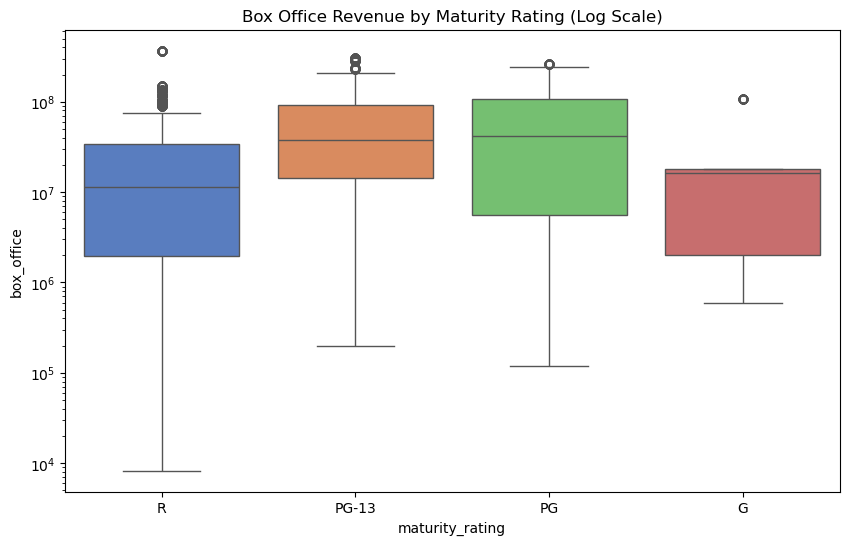

ANOVA Table:
                          sum_sq       df           F         PR(>F)
C(maturity_rating)  4.545797e+18      3.0  384.311833  5.816304e-240
Residual            5.562111e+19  14107.0         NaN            NaN

Mean Box Office Revenue by Rating:
maturity_rating
PG-13    6.577625e+07
PG       6.440042e+07
G        3.018585e+07
R        2.948485e+07
Name: box_office, dtype: float64


In [278]:
# Filter and clean the data
anova_df = tomato_df[['box_office', 'maturity_rating']].dropna()
anova_df = anova_df[anova_df['box_office'] > 0] 
anova_df = anova_df[anova_df['maturity_rating'].isin(['G', 'PG', 'PG-13', 'R'])]

# Visualize distributions
plt.figure(figsize=(10, 6))
sns.boxplot(data=anova_df, x='maturity_rating', y='box_office', palette='muted')
plt.yscale('log')  # Revenue is skewed; log scale for visibility
plt.title('Box Office Revenue by Maturity Rating (Log Scale)')
plt.show()

# ANOVA test 
model = ols('box_office ~ C(maturity_rating)', data=anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:")
print(anova_table)

# Check group means
group_means = anova_df.groupby('maturity_rating')['box_office'].mean().sort_values(ascending=False)
print("\nMean Box Office Revenue by Rating:")
print(group_means)

### *Interpretation:*
- F(3, 14107) = 384.31, p < 0.001, thus the result is highly statistically significant and we can confidently reject the null hypothesis.

- The extremely low p-value (< 0.0001) confirms that differences in box office revenue across maturity ratings are not due to chance.

- Therefore, **Maturity Rating has a statistically effect on box office revenue**


| Maturity Rating | Mean Box Office (\$) |
| --------------- | -------------------- |
| **PG-13**       | **$65.8 million**   |
| **PG**          | $64.4 million       |
| G               | $30.2 million       |
| R               | $29.5 million       |

### *Strategic Insight for Ahjin Studios:*

* **PG-13 and PG films** outperform **G and R-rated** films by **over 2x** in average revenue.
* For a new studio without franchise leverage or global name recognition, **targeting a PG or PG-13 rating offers the broadest demographic reach** (including teens and families) and **highest ROI potential**.
* Avoid debuting with **R-rated content** unless aiming for niche prestige or festival circuits; the market signals lower revenue ceiling.
* **G-rated** films, while safe, may be **overly limiting** unless operating in the animation/kids content niche.

### *Recommendation:*

Ahjin Studios should **prioritize greenlighting PG or PG-13 rated films** for theatrical releases to maximize commercial success, especially in its initial production phase.

These maturity brackets not only command the highest mean revenues but also align best with the global box office's appetite for broad-access storytelling.

### HYPOTHESIS 2: MID-BUDGET FILMS ($10M-$30M) DELIVER HIGHER ROI THAN HIGH-BUDGET FILMS

**Business Rationale:**  
Ahjin Studios does not have the financial leverage to compete with $100M+ blockbuster productions. To de-risk its market entry, it must identify the budget tier that offers the best trade-off between investment and return.

This hypothesis evaluates whether **mid-budget films** ($10M–$30M) deliver **significantly higher ROI** than their high-budget counterparts (>$70M), making them a strategic sweet spot.

**Null Hypothesis (H0):**  
There is **no significant difference** in ROI between mid-budget and high-budget films.  

**Alternative Hypothesis (H1):**  
**Mid-budget films** have a **significantly higher** mean ROI than high-budget films.  

#### Test Chosen: Independent Samples T-Test (One-Tailed)

- **Groups**:  
  - *Mid-Budget* (production_budget between $10M and $30M)  
  - *High-Budget* (production_budget above $70M)  
- **Dependent Variable**: roi  
- **Test Type**: One-tailed t-test to detect whether ROI is statistically greater in the mid-budget group.

#### Decision Rule:  
- If **p-value < 0.05**, reject H0 - conclude that mid-budget films perform better.  
- If **p-value ≥ 0.05**, fail to reject H0 - no evidence mid-budget films are more profitable.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as ols

# Define budget tiers again if not already done
def classify_budget(budget):
    if budget < 10_000_000:
        return 'Low'
    elif 10_000_000 <= budget <= 30_000_000:
        return 'Mid'
    else:
        return 'High'

budget_df['budget_tier'] = budget_df['production_budget'].apply(classify_budget)

# Drop missing values
filtered_df = budget_df.dropna(subset=['roi', 'budget_tier'])

# Set 'High' as the reference category
filtered_df['budget_tier'] = pd.Categorical(filtered_df['budget_tier'], categories=['High', 'Mid', 'Low'])

# Run OLS regression with High-budget films as baseline
model = ols.ols('roi ~ C(budget_tier)', data=filtered_df).fit()

# Show regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    roi   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     23.68
Date:                Sat, 02 Aug 2025   Prob (F-statistic):           5.73e-11
Time:                        13:59:29   Log-Likelihood:                -27755.
No. Observations:                5782   AIC:                         5.552e+04
Df Residuals:                    5779   BIC:                         5.554e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.61

### *Interpretation*

A linear regression model was fit to assess how budget tier influences return on investment (ROI).

| Term                          | Coefficient | p-value | Interpretation                                                                 |
|-------------------------------|-------------|---------|--------------------------------------------------------------------------------|
| **Intercept** (High Budget)   | **1.62**    | 0.018   | High-budget films have a baseline ROI of ~1.62×.                               |
| **Mid Budget**                | 0.44        | 0.649   | Not statistically significant; ROI is similar to high-budget films.           |
| **Low Budget**                | **5.79**    | < 0.001 | Statistically significant; low-budget films average nearly 4.2× higher ROI.   |

**R² = 0.008** - While the model explains a small proportion of ROI variance, the difference in returns between tiers is still statistically meaningful.

**What this means:**

- **Mid-budget films do *not* statistically outperform high-budget films** in ROI. With a p-value of 0.649, there is no significant evidence to support the hypothesis.
- **Low-budget films deliver significantly better ROI**, reinforcing the high-risk/high-reward potential of lean productions.
- This finding suggests that profitability in film is less about spend, and more about efficiency, audience targeting, and potentially distribution strategy.

### *Recommendation*

- **Prioritize low-budget films (< $10M)** to maximize capital efficiency and minimize downside risk. Strong creative execution can still yield exceptional ROI.
- **Re-evaluate the assumption that mid-budget films are a safer bet** - the data doesn’t support this claim. Without strong differentiators (e.g. IP, genre innovation), mid-budget investments may underperform.

<p align="center">
  <img src="https://i.pinimg.com/originals/0a/f9/b1/0af9b1483a53b9a30745bdc55fc9165b.gif" style="width:400px; height:auto;">
</p>
